<div style="text-align: center;">
  Trabajo realizado por Abril Jostin, Vargas Jorfan, Gómez Sebastian
</div>

# Librerías a implementar

In [12]:
# Manejo de datos
import numpy as np
import pandas as pd

# Configuración para ver todas las columnas del conjunto de datos
pd.set_option('display.max_columns', None)

# Configuración para ver todas las filas del conjunto de metadatos
pd.set_option('display.max_rows', None)

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# EDA
from itertools import combinations
from scipy.stats import mannwhitneyu, ttest_ind, chi2_contingency

# Machine Learning
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# Desactivas advertencias
import warnings
warnings.filterwarnings('ignore')

# Introducción y Cargue de datos

En esta competencia, organizada por Home Credit Group, se nos presenta un desafío relacionado con la inclusión financiera de poblaciones subatendidas. Muchas personas enfrentan dificultades para acceder a préstamos debido a historiales crediticios insuficientes o inexistentes. Esta situación las expone a prácticas de prestamistas poco confiables y limita su acceso a oportunidades financieras.

Home Credit busca mejorar esta situación ofreciendo experiencias de préstamo positivas y seguras, utilizando datos alternativos, como información transaccional y de telecomunicaciones, para predecir la capacidad de pago de sus clientes. Actualmente, Home Credit emplea diversos métodos estadísticos y de aprendizaje automático para estas predicciones. Sin embargo, el propósito de esta competencia es explorar nuevas estrategias y enfoques para maximizar el potencial de sus datos.

El objetivo final es asegurar que los clientes con capacidad de pago no sean rechazados, mientras se diseñan préstamos con condiciones adecuadas, como el principal, el vencimiento y el calendario de pagos. Esto no solo mejora las tasas de aprobación, sino que también fomenta el éxito financiero de los prestatarios.

¡Exploremos el conjunto de datos! :)

In [14]:
#data = pd.read_csv('/home/jorfan/Universidad/Semestre_6/ML2/PROYECTO_FINAL/train.csv')
data = pd.read_csv('Data/train.csv')
data.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [15]:
# Información general del conjunto de datos
print(data.shape)
data.describe()

(307511, 122)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Análisis Exploratorio de Datos

## Análisis Univariado

### Análisis Categórico

#### Conversión de variables a tipo "category"

Se realiza la conversión de las variables que tengan menos de 12 valores únicos y tipo "object" a tipo "category", con el objetivo de no tener variables numéricas que en realidad son categóricas. Esto adicionalmente nos permitirá tener desde un inicio los tipos de variables segmentados.

In [16]:
# Se convierten algunas variables a tipo "category"
for var in data.columns:
    
    if len(data[var].unique()) <= 12:
        data[var] = data[var].astype('category')
    elif data[var].dtypes == 'object':
        data[var] = data[var].astype('category')
    else:
        data[var] = data[var].astype('float64')

# Se crea una variable que contiene la lista de variables numéricas
numeric_cols = data.select_dtypes(include=['float64']).columns.tolist()

# Cantidad de variables numéricas iniciales
len(numeric_cols)

# Se crea una variable que contiene la lista de variables categóricas
columnas_categoricas = data.select_dtypes(include=['category']).columns.tolist()

# Cantidad de variables categóricas iniciales
len(columnas_categoricas)

57

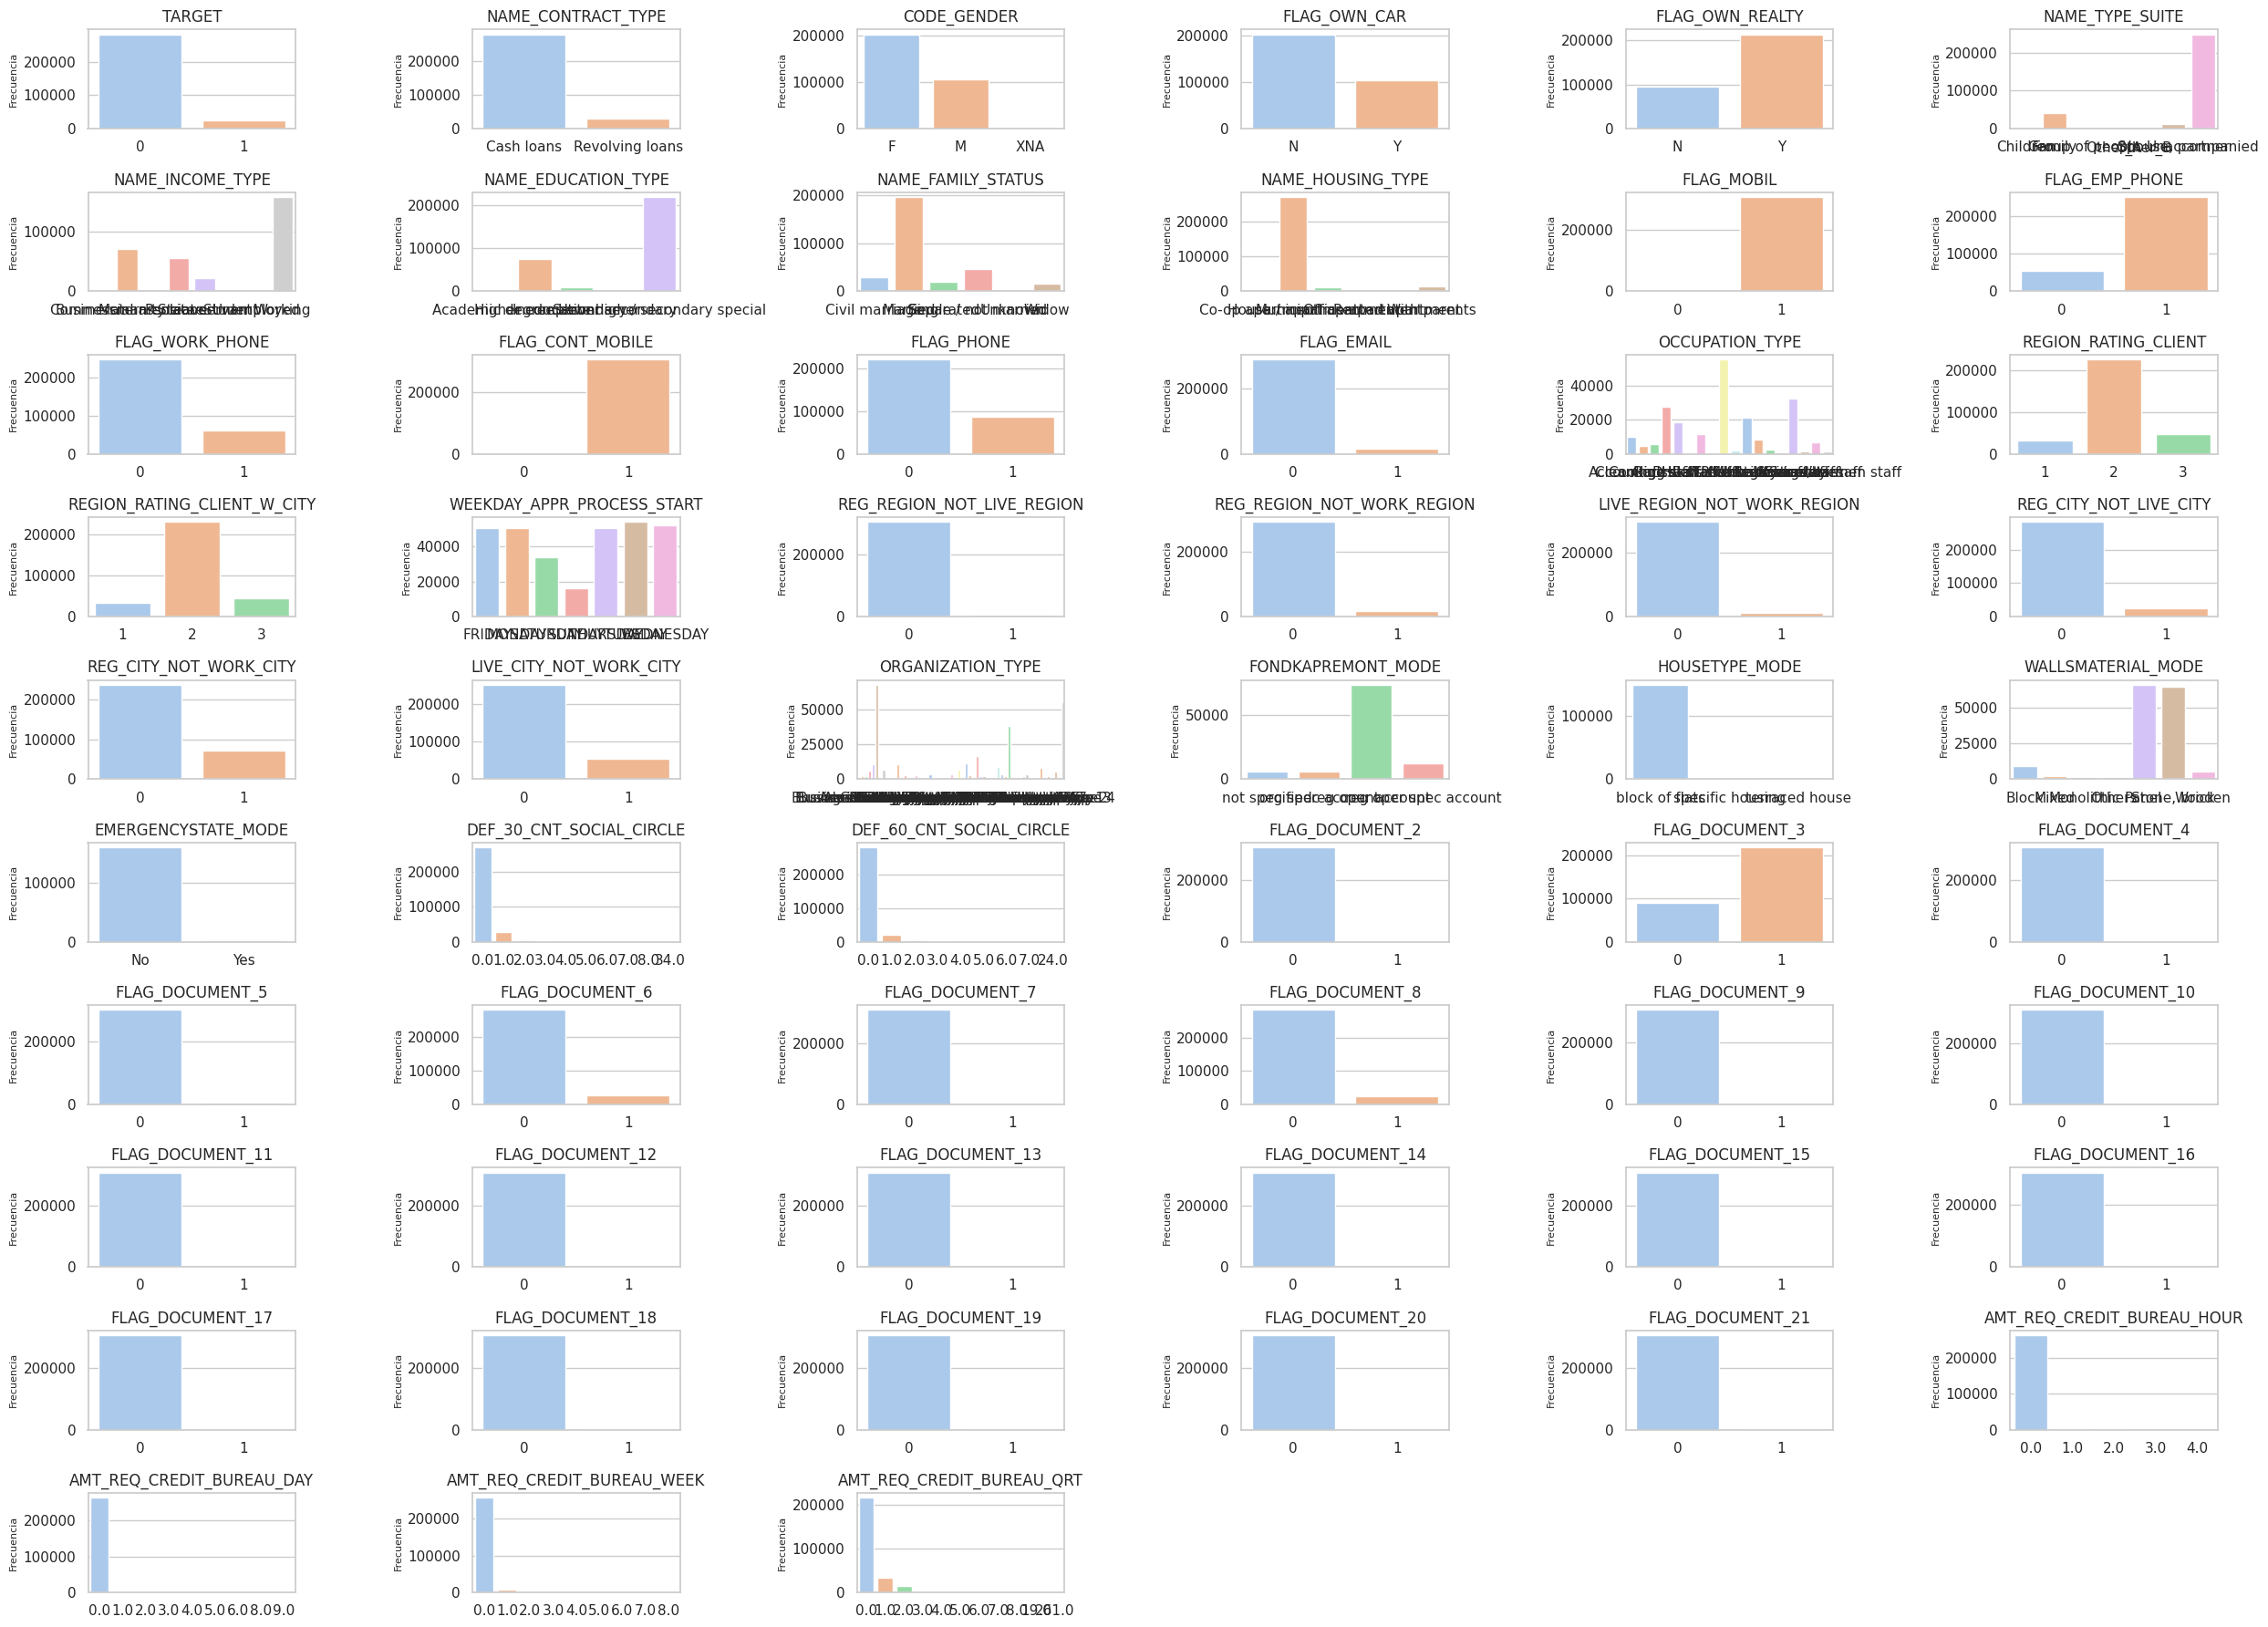

In [10]:
# Un panorama general de las variables categóricas
# Estilo general
sns.set_theme(style="whitegrid")

# Configuración de la figura y subgráficos
n_filas = 10
n_columnas = 6
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(25, 18))
axes = axes.flatten()

for i, columna in enumerate(columnas_categoricas):
    if i < len(axes):
        sns.countplot(
            data=data,
            x=columna,
            ax=axes[i],
            palette="pastel"
        )
        axes[i].set_title(columna)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frecuencia", fontsize=8)
    else:
        axes[i].axis('off')

# Desactivar gráficos vacíos
for j in range(len(columnas_categoricas), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Tratamiento de valores faltantes

In [11]:
# Se calcula la proporción de valores faltantes por variable
porcentaje = data[columnas_categoricas].isnull().mean() * 100

# Se filtra por variables que tienen más de 30% de valores faltantes
var_con_faltantes = porcentaje[porcentaje > 30].index.tolist()

# Proporci+on de faltantes
var_faltantes = porcentaje[porcentaje > 30]

# Columnas con más del 30% de valores faltantes
print("Columnas con más del 30% de valores faltantes:")
print(var_con_faltantes, len(var_con_faltantes))
print(var_faltantes)

Columnas con más del 30% de valores faltantes:
['OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'] 5
OCCUPATION_TYPE        31.345545
FONDKAPREMONT_MODE     68.386172
HOUSETYPE_MODE         50.176091
WALLSMATERIAL_MODE     50.840783
EMERGENCYSTATE_MODE    47.398304
dtype: float64


Visualización de variables con mayor cantidad de valores faltantes.

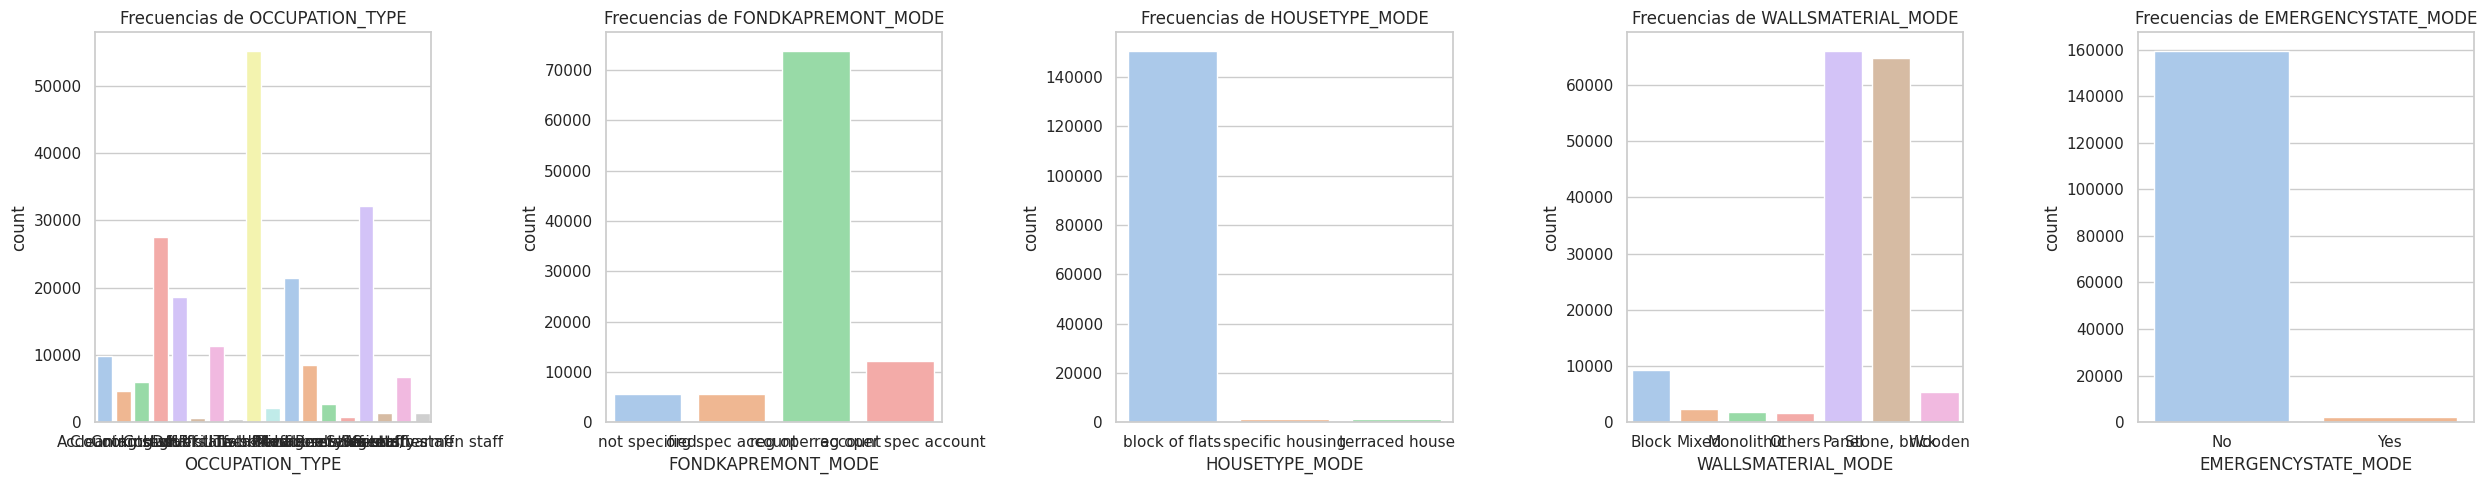

In [12]:
fig, axes = plt.subplots(1, len(var_con_faltantes), figsize=(5 * len(var_con_faltantes), 5))

# Se itera sobre las columnas y los ejes
for i, col in enumerate(var_con_faltantes):
    sns.countplot(x=col, data=data, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Frecuencias de {col}')

plt.tight_layout()
plt.show()

Se decide eliminar las columnas ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], pues tienen un proporción de valores faltantes superior a 47%, lo cual es una cantidad que no se puede imputar y tampoco se pueden eliminar los registros. Por otro lado, se decide conservar la variable 'OCCUPATION_TYPE' ya que tiene menor proporción de valores faltantes, sin embargo, la razón principal, es que se considera que es una variable importante para el negocio, pues se quiere predecir si se le prestará dinero a una persona o no, seguramente el tipo de ocupación sea útil.

In [13]:
# se eliminan las variables que continen una gran cantidad de valores nulos
elementos_a_eliminar = ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
columnas_categoricas = [x for x in columnas_categoricas if x not in elementos_a_eliminar]
len(columnas_categoricas)

53

Ahora, se eliminan los registros de las variables que tienen menos de 5% de valores faltantes ya que, la cantidad de datos es suficiente para hacer el análisis y el modelo sin los registros eliminados.

In [14]:
porcentaje = data[columnas_categoricas].isnull().mean() * 100
columns_to_clean = porcentaje[porcentaje < 5].index

# Se eliminan los registros de las variables que cumplen la condición anterior
data = data.dropna(subset=columns_to_clean)

Se verifican las variables con valores faltantes restantes

In [15]:
porcentaje = data[columnas_categoricas].isnull().mean() * 100
columnas_con_nulos = porcentaje[porcentaje > 0]

# Columnas con valores nulos
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
OCCUPATION_TYPE               31.350468
AMT_REQ_CREDIT_BUREAU_HOUR    13.512539
AMT_REQ_CREDIT_BUREAU_DAY     13.512539
AMT_REQ_CREDIT_BUREAU_WEEK    13.512539
AMT_REQ_CREDIT_BUREAU_QRT     13.512539
dtype: float64


Dado que las  variables restantes tienen menor cantidad de valores atípicos, se incluirá a cada variable una categoría llamada "desconocido" y se añadirán los valores nulos a esta categoría

In [16]:
# Se le agrega la categoria desconocido
for columna in columnas_categoricas:
    # Se añade 'Desconocido' a las categorías si no está presente
    data[columna] = data[columna].astype('category')
    if 'Desconocido' not in data[columna].cat.categories:
    # Si no está, agregar 'Desconocido'
        data[columna] = data[columna].cat.add_categories('Desconocido')

    # Se rellena los valores nulos con 'Desconocido'
    data[columna] = data[columna].fillna('Desconocido')
data[columnas_categoricas] = data[columnas_categoricas].fillna('Desconocido')

In [17]:
# Se verifica que ya no hayan nulos
porcentaje = data[columnas_categoricas].isnull().mean() * 100

# Se filtran las columas
columns_with_many_missing = porcentaje[porcentaje > 0].index.tolist()

# Mostrar las columnas
print("Columnas con más del 0% de valores faltantes:")
print(columns_with_many_missing, len(columns_with_many_missing))

Columnas con más del 0% de valores faltantes:
[] 0


#### Detección de categorías atípicas
Al tener distintas categorías en las variables del conjunto de datos pueden llegar a tener muy pocos registros lo que no aporta suficiente información relevante para el análisis, lo que podría distorsionar los resultados si se las mantiene como categorías separadas. Agruparlas en la categoría "Otros" ayuda a reducir el ruido en los datos.

In [18]:
# Este código convierte las categorias de una variable que tengan menos del 10% de los datos en una categoria llamada otros
# Umbral
threshold = 0.1

# Función para obtener categorías atípicas y agruparlas en "Otros"
def find_low_frequency_categories(df, threshold):
    for col in columnas_categoricas:
        frequencies = df[col].value_counts(normalize=True)  # Porcentajes
        # Se detecta categorías con baja frecuencia relativa
        low_frequency_categories = frequencies[frequencies < threshold]

        # Si hay más de 2 categorías con baja frecuencia, agruparlas en 'Otros'
        if len(low_frequency_categories) > 2:
            # Se crea una nueva columna con 'Otros' para las categorías con baja frecuencia
            df[col] = df[col].apply(lambda x: x if frequencies[x] >= threshold else 'Otros')
            print(f"\nDespués de agrupar, la columna {col} tiene las siguientes categorías:")
            print(df[col].value_counts())

find_low_frequency_categories(data, threshold)


Después de agrupar, la columna NAME_TYPE_SUITE tiene las siguientes categorías:
NAME_TYPE_SUITE
Unaccompanied    247637
Family            40058
Otros             17503
Name: count, dtype: int64

Después de agrupar, la columna NAME_INCOME_TYPE tiene las siguientes categorías:
NAME_INCOME_TYPE
Working                 157661
Commercial associate     70937
Pensioner                54995
Otros                    21605
Name: count, dtype: int64

Después de agrupar, la columna NAME_EDUCATION_TYPE tiene las siguientes categorías:
NAME_EDUCATION_TYPE
Secondary / secondary special    217067
Higher education                  73966
Otros                             14165
Name: count, dtype: int64

Después de agrupar, la columna NAME_FAMILY_STATUS tiene las siguientes categorías:
NAME_FAMILY_STATUS
Married                 195053
Otros                    65163
Single / not married     44982
Name: count, dtype: int64

Después de agrupar, la columna NAME_HOUSING_TYPE tiene las siguientes categorías:


In [19]:
# Se eliminan las categorias de Desconocidos en donde no tiene valores
data[columnas_categoricas] = data[columnas_categoricas].apply(lambda x: x.astype('category'))
for columna in columnas_categoricas:
    # Se verificar si la categoría 'Desconocido' está presente y si tiene valores
    if 'Desconocido' in data[columna].cat.categories and data[columna].value_counts().get('Desconocido', 0) == 0:
        # Se elimina la categoría 'Desconocido' si no tiene valores
        data[columna] = data[columna].cat.remove_categories('Desconocido')

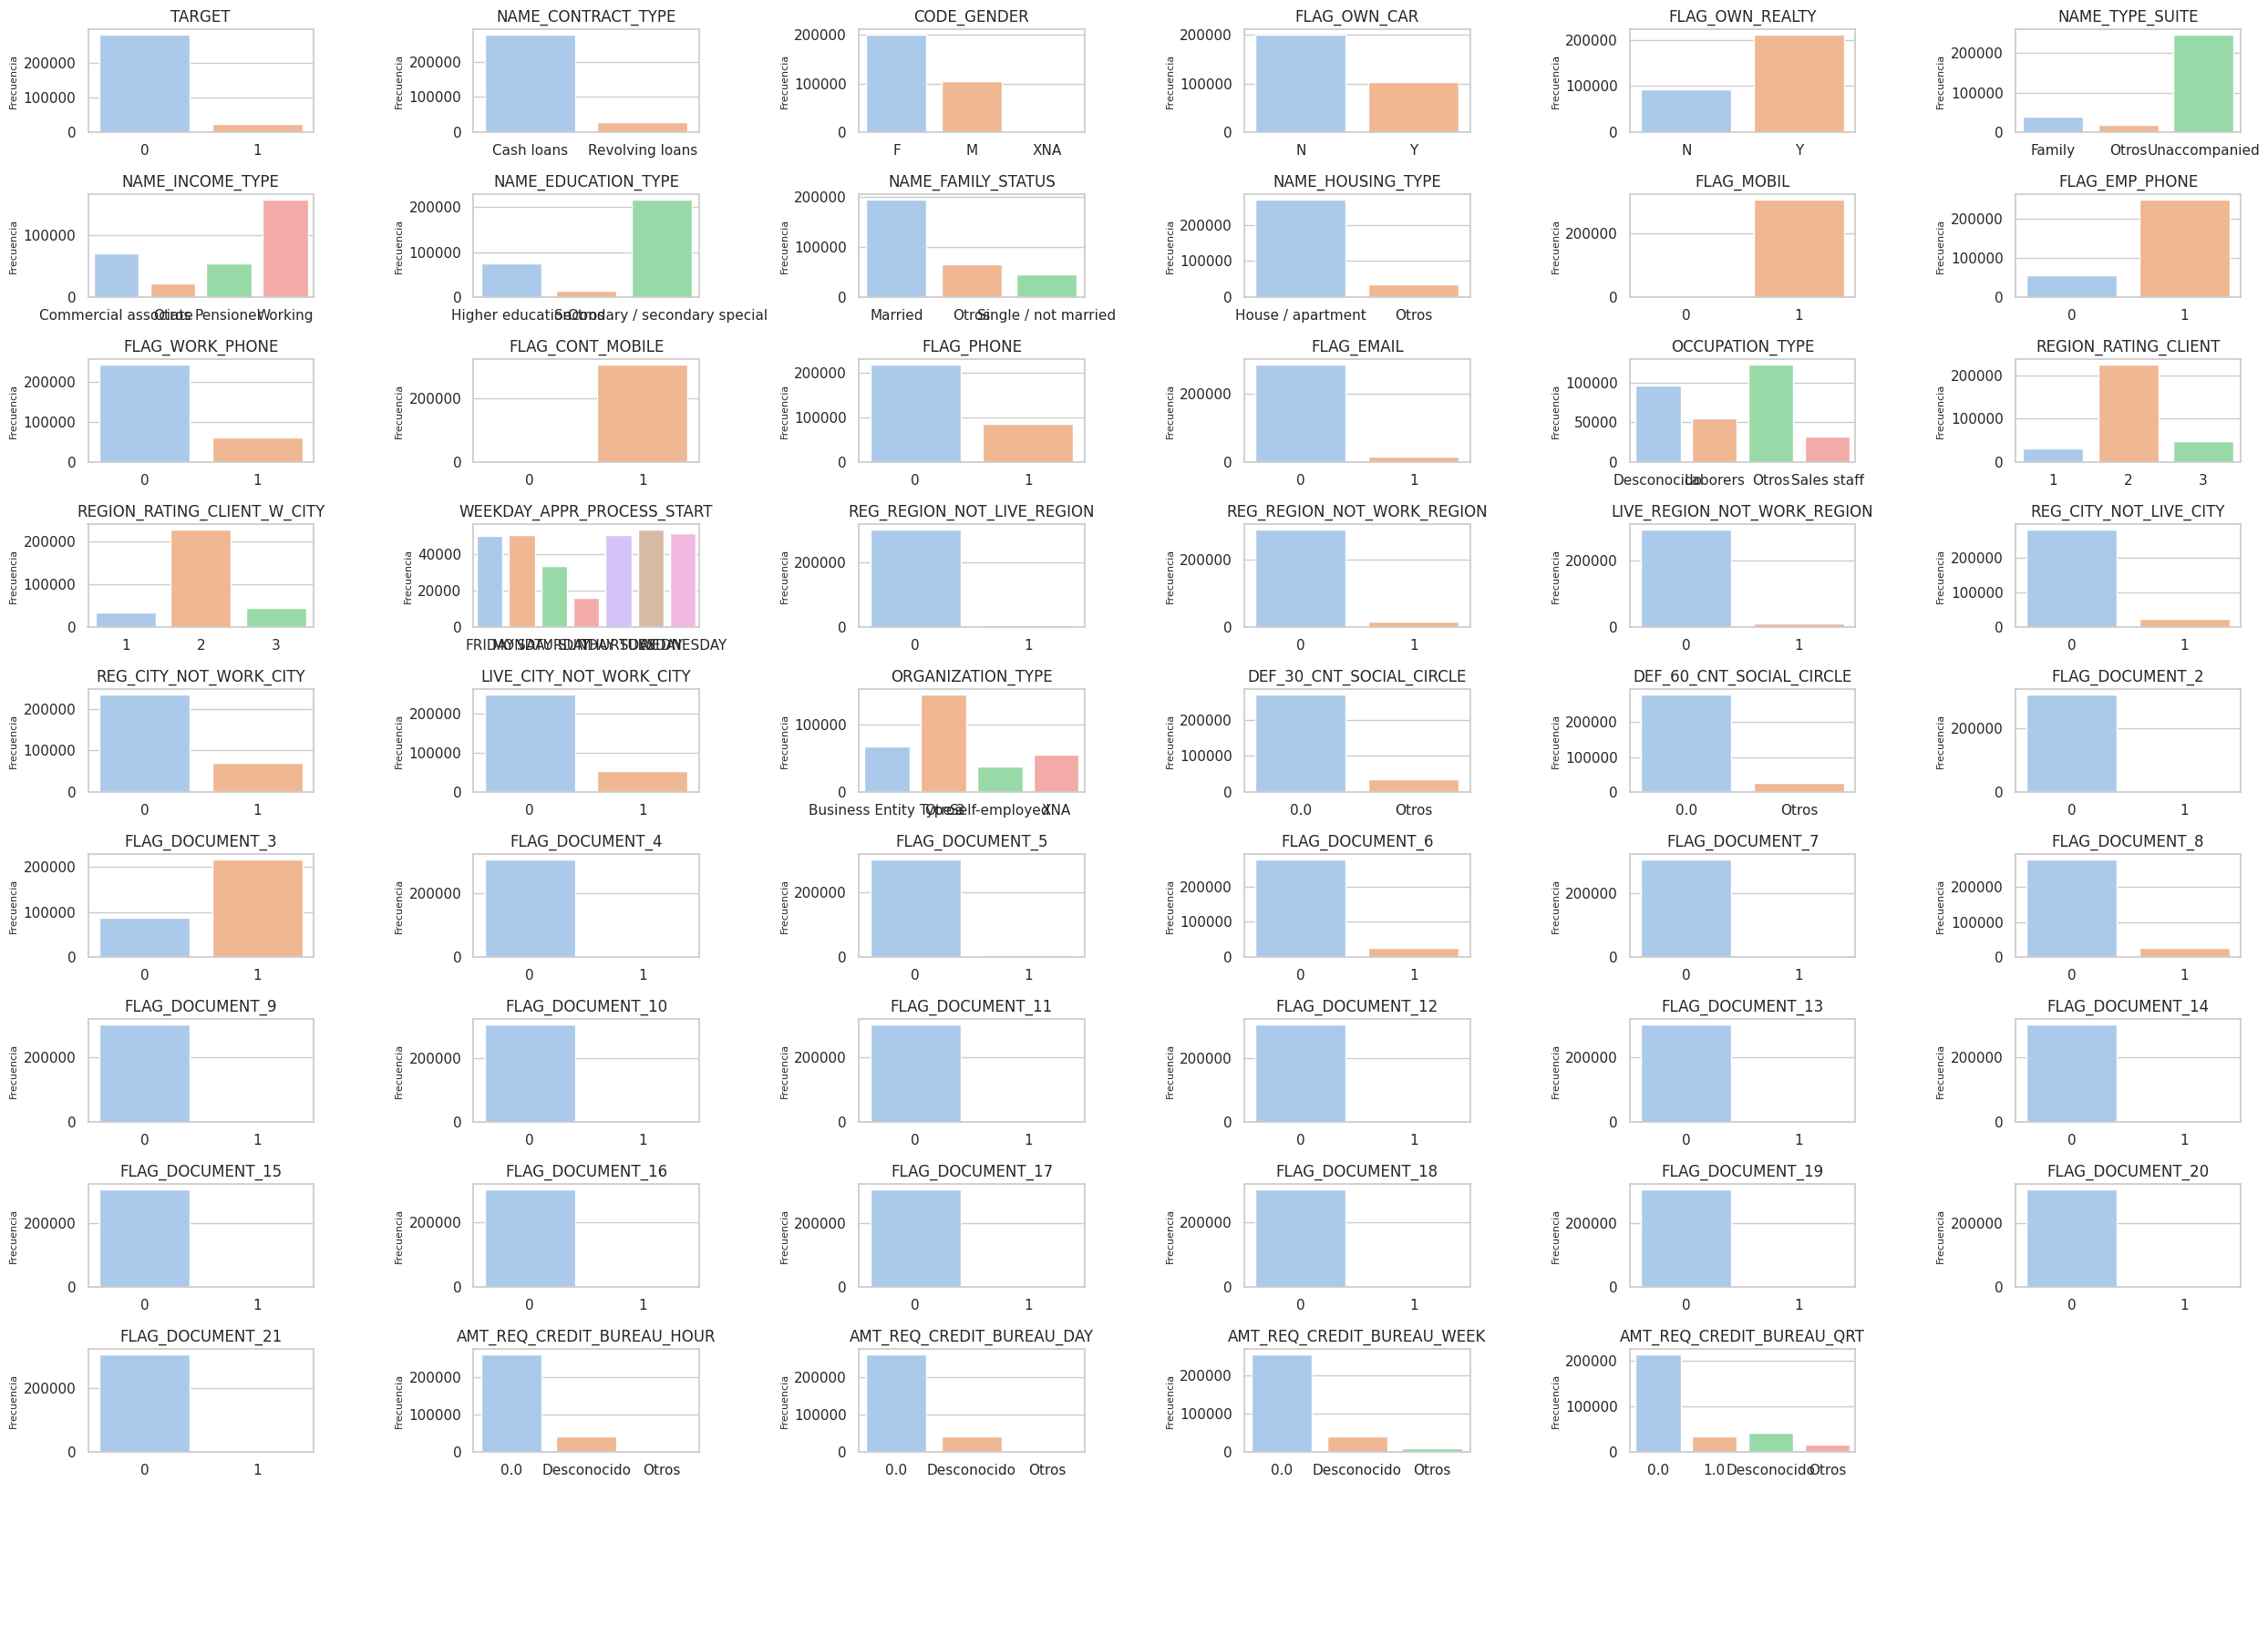

In [20]:
# Estilo general
sns.set_theme(style="whitegrid")

# Configuración de la figura y subgráficos
n_filas = 10
n_columnas = 6
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(25, 18))
axes = axes.flatten()

for i, columna in enumerate(columnas_categoricas):
    if i < len(axes):
        sns.countplot(
            data=data,
            x=columna,
            ax=axes[i],
            palette="pastel"
        )
        axes[i].set_title(columna)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frecuencia", fontsize=8)
    else:
        axes[i].axis('off')

# Desactivar gráficos vacíos
for j in range(len(columnas_categoricas), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


#### Selección de variables categóricas

In [21]:
# Se obtienen las variables que tienen relación significativa con la variable objetivo
# Nivel de significancia
alpha = 0.05
relacion_sig =[]
# Se itera sobre las columnas categóricas
for col in columnas_categoricas:
    # tabla de contingencia
    contingency_table = pd.crosstab(data[col], data['TARGET'])

    # rueba de chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Se verifica si el valor p es menor que el nivel de significancia
    if p <= alpha:
        relacion_sig.append(col)
        #print(f"Variable '{col}' tiene una relación significativa con 'TARGET' (p-value = {p})")

In [22]:
# Se disminuye la cantidad de variables categóricas candidatas
len(relacion_sig)

41

Se conservan las variables que tienen una relación significativa con la variable objetivo y posteriormente se eligen las variables categóricas que aportan más infomación al modelo a partir de la entropía.

In [87]:
# Función para calcular la entropía de una variable categórica
def calcular_entropia(columna):
    frecuencias = columna.value_counts(normalize=True)
    entropia = -np.sum(frecuencias * np.log2(frecuencias))
    return entropia

# Se calcula la entropía para cada columna categórica
entropias = {col: calcular_entropia(data[col]) for col in relacion_sig}
entropias_ordenadas = sorted(entropias.items(), key=lambda x: x[1], reverse=True)

top_10_variables = entropias_ordenadas[:10]
top_10_variables_nombre = list(map(lambda t: t[0], top_10_variables))

print("Top 10 variables categóricas con mayor entropía:")
for col, entropia in top_10_variables:
    print(f"{col}: {entropia}")

Top 10 variables categóricas con mayor entropía:
WEEKDAY_APPR_PROCESS_START: 2.7322224183020927
OCCUPATION_TYPE: 1.8383839020274353
ORGANIZATION_TYPE: 1.8120745109488716
NAME_INCOME_TYPE: 1.697358972920649
AMT_REQ_CREDIT_BUREAU_QRT: 1.3300113121119999
NAME_FAMILY_STATUS: 1.2953465755809652
REGION_RATING_CLIENT: 1.0833909390084209
REGION_RATING_CLIENT_W_CITY: 1.067726447971355
NAME_EDUCATION_TYPE: 1.0507980653429192
CODE_GENDER: 0.9266190888991733


Se eligen estas variables porque suelen contener más información útil y relevante para discriminar entre las clases objetivo, adicionalmente, se está frente a un conjunto de datos donde la mayoría de las variables tienen una clase dominante, al usar esta metodología aparte de que se está obteniendo información útil para el modelo, también se está diminuyendo el sesgo.

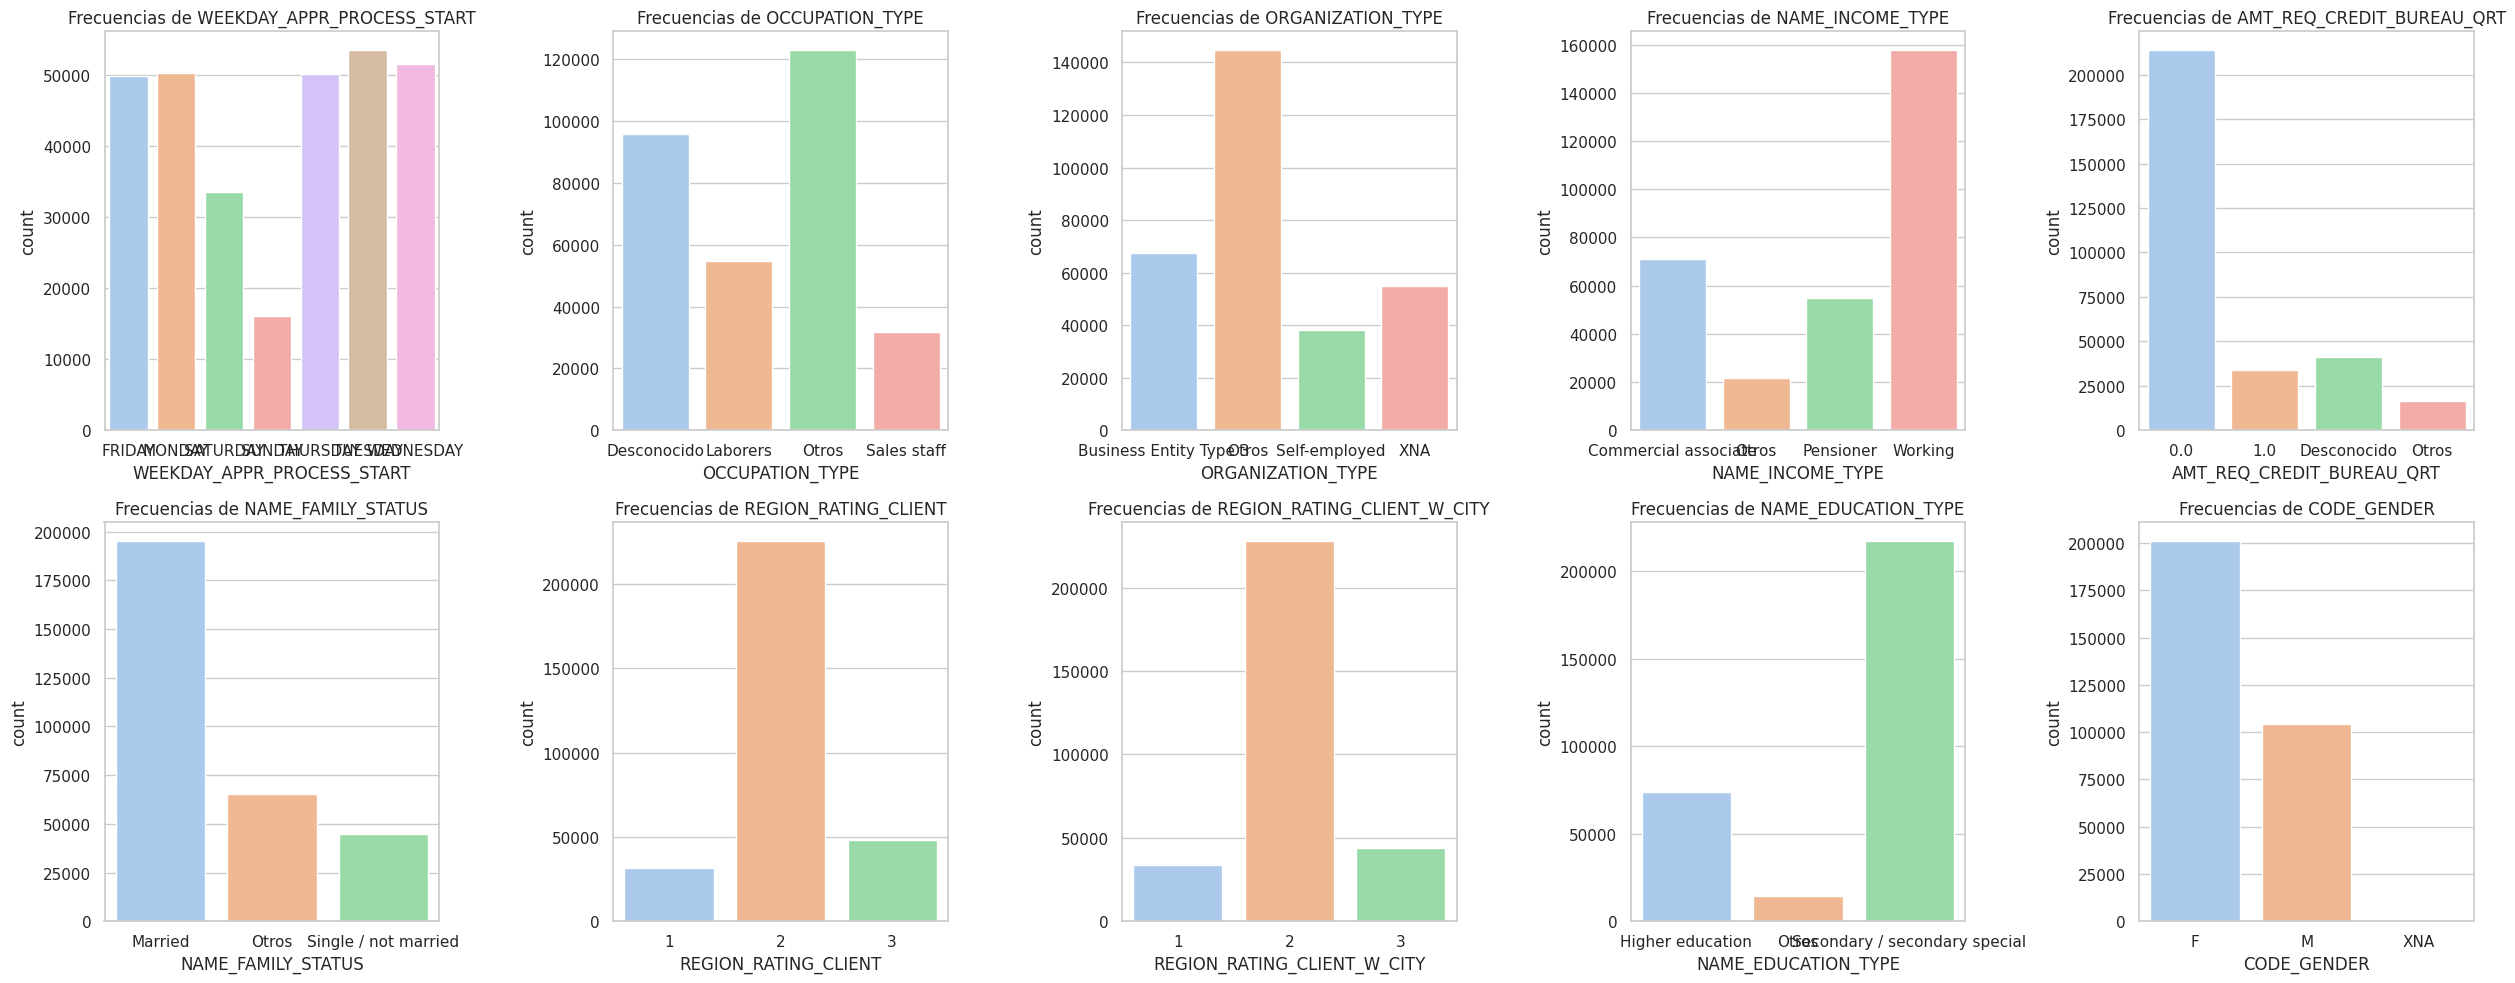

In [24]:
fig, axes = plt.subplots(2, 5, figsize=(5 * 5, 5 * 2))

axes = axes.flatten()

for i, col in enumerate(top_10_variables_nombre):
    sns.countplot(x=col, data=data, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Frecuencias de {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Análisis Numérico

#### Tratamiento de valores faltantes

En este caso identificamos varios casos de porcentajes de valores faltantes en el conjunto de datos, considerando que hay un total de `307.511` registros, tomamos una acción diferente para cada caso.

In [25]:
# Calcular el porcentaje de valores faltantes para cada columna
missing_percentage = data[numeric_cols].isnull().sum() / data[numeric_cols].shape[0] * 100
missing_percentage

,0
SK_ID_CURR,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003932
AMT_GOODS_PRICE,0.000000
REGION_POPULATION_RELATIVE,0.000000
DAYS_BIRTH,0.000000
DAYS_EMPLOYED,0.000000
DAYS_REGISTRATION,0.000000


Así mismo tenemos en cuenta que de las 65 variables numéricas, el **25%** de las variables poseen a lo sumo un total de **0.21%** de valores faltantes, por el contrario, existe la alta proporción de variables con porcentajes de valores faltantes superiores al **50%**.

In [26]:
missing_percentage.describe()

,0
count,65.000000
mean,41.144543
std,27.095105
min,0.000000
25%,0.214615
50%,50.402362
75%,59.422735
max,69.908387


##### Caso 1:

Para la eliminación de valores faltantes consideramos un umbral de **20%**, del cual para el `caso 1` identificamos que existe un total de 45 variables que superan este umbral, por lo cual consideramos eliminar estas variables debido a que un método de imputación no resultaría tan eficiente debido a la escasa información que se presentan en ellas.

In [27]:
# Filtrar las columnas con más del 10% de valores faltantes
columns_with_high_missing = missing_percentage[missing_percentage > 20]

# Nombre de las columnas a eliminar
del_cols = columns_with_high_missing.index

print(f'''Hay un total de {len(columns_with_high_missing)} variables con porcentaje de valores faltantes mayor a 20%''')

Hay un total de 45 variables con porcentaje de valores faltantes mayor a 20%


Por lo cual nuestras variables numéricas que mantendremos serán las listadas a continuación, siendo éstas un total de 19 variables.

In [28]:
# Actualizar la lista numeric_cols eliminando las columnas eliminadas
numeric_cols = [col for col in numeric_cols if col not in del_cols]
numeric_cols.remove('SK_ID_CURR') # Esta es el ID único
numeric_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [29]:
data[numeric_cols].shape

(305198, 19)

##### Caso 2:

Del mismo modo evidenciamos que hay variables que poseen menos del **1%** de valores faltantes, y otras con más del **1%**. En este caso trataremos con las variables que tienen menos del **1%** y el proceder decidido fue eliminar los registros que tienen valores nulos, debido a que consideramos que el conjunto de datos es extenso y los pocos registros eliminados no deberían tener un impacto significativo sobre la distribución de los datos.

In [30]:
# Filtrar las columnas con un porcentaje de valores faltantes entre 0% y 1%
columns_with_low_missing = missing_percentage[(missing_percentage > 0) & (missing_percentage <= 1)]

# Lista de columnas a evaluar
cols_to_check = columns_with_low_missing.index

# Eliminar registros que tienen valores faltantes en las columnas seleccionadas
rows_to_drop = data[cols_to_check].isnull().any(axis=1)
data = data[~rows_to_drop]

print(f'''Se eliminaron {rows_to_drop.sum()} registros con valores faltantes
en las columnas con menos del 1% de valores faltantes.''')

Se eliminaron 667 registros con valores faltantes 
en las columnas con menos del 1% de valores faltantes.


##### Caso 3:

Para este caso consideramos las variables que poseen menos del **20%** de valores faltantes y procedemos a aplicar imputación con la mediana sobre estos valores faltantes.

**Nota:** En principio la intención era imputar con la KNN, pero el computo no dio y se morian o no finalizaban los procesos. KNN era para cuasi conservar la distribución de los datos, a diferencia de imputación con la mediana que no conserva la distribución en los mismos.

In [31]:
data[numeric_cols].isnull().sum()/data[numeric_cols].shape[0]*100

,0
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.000000
AMT_GOODS_PRICE,0.000000
REGION_POPULATION_RELATIVE,0.000000
DAYS_BIRTH,0.000000
DAYS_EMPLOYED,0.000000
DAYS_REGISTRATION,0.000000
DAYS_ID_PUBLISH,0.000000


Realizando la imputación con la mediana.

In [32]:
# Crear una instancia del imputador de la mediana
median_imputer = SimpleImputer(strategy='median')

# Aplicar la imputación directamente sobre las columnas numéricas en el DataFrame original
data[numeric_cols] = median_imputer.fit_transform(data[numeric_cols])

# Verificar los primeros registros después de la imputación
data[numeric_cols].head(4)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1.0,10.0,0.262949,0.139376,2.0,2.0,-1134.0,0.0,1.0
1,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,2.0,11.0,0.622246,0.535276,1.0,1.0,-828.0,0.0,0.0
2,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,1.0,9.0,0.555912,0.729567,0.0,0.0,-815.0,0.0,0.0
3,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,2.0,17.0,0.650442,0.535276,2.0,2.0,-617.0,0.0,1.0


Verificando que no hayan datos nulos.

In [33]:
data[numeric_cols].isnull().sum()

,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
AMT_GOODS_PRICE,0
REGION_POPULATION_RELATIVE,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0
DAYS_REGISTRATION,0
DAYS_ID_PUBLISH,0


#### Conversión de categoría

Convertir una variable a un tipo de dato `int64` no es posible cuando hay valores faltantes, hecho este paso convertivos dos variables a este tipo de dato para facilitar su entendimiento.

In [34]:
# Convertir las columnas al tipo int64
data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']] = data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']].astype('int64')

# Verificar el cambio de tipo
data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']].dtypes

,0
CNT_CHILDREN,int64
CNT_FAM_MEMBERS,int64


#### Pruebas de normalidad

Realizamos la prueba de normalidad de Shapiro Wilk, para ello importamos la librería a utilizar.

Pese a que en la fase de visualización de las distribuciones de cada variable pudimos evidenciar la no-normalidad de las mismas, decidimos realizar la prueba de normalidad por protocolo. También reconocemos que la esta prueba de normalidad suele ser útil en conjunto de datos pequeños, y por lo cual podría no ser eficaz en este caso, decidimos implementarla más que todo por lo que ya sabiamos *(por las visualizaciones)* que no son normales.

In [35]:
# Crear una lista para almacenar los resultados
results = []

# Iterar sobre cada columna numérica
for col in numeric_cols:
    # Realizar la prueba de normalidad Shapiro-Wilk
    _, p_value = shapiro(data[col])

    # Determinar si es normal o no
    normality = "Normal" if p_value >= 0.05 else "-"

    # Agregar el resultado a la lista
    results.append({'Variable': col, 'Normalidad': normality})

# Convertir la lista de resultados a un DataFrame
normality_results = pd.DataFrame(results)

normality_results.head(4)

,Variable,Normalidad
0,CNT_CHILDREN,-
1,AMT_INCOME_TOTAL,-
2,AMT_CREDIT,-
3,AMT_ANNUITY,-


Cómo podemos ver ninguna variable es reconocida como normal, bajo la prueba de Skapiro Wilk, la celda de abajo muestra las variables que mediante el P-Valor de Shapiro Wilk, deberían ser normales.

In [36]:
normality_results[normality_results["Normalidad"] != '-']

,Variable,Normalidad


#### Visualización de distribuciones

Ahora empezaremos a visualizar las distribuciones de las variables numéricas para poder realizar un análisis descriptivo sobre las mismas.

##### Sobre cliente

En primera instancia vamos a considerar la información que corresponde al cliente, decriptores como cuántos hijos tiene, cuánto gana, etc. Variables que describen al cliente.

En el caso de la información del score *(asumimos que crediticio)* proveniente de tres (3) centrales de riesgo diferentes, aunque la central número uno (1) fue eliminada debido a la alta presencia de valores faltantes, de ello podemos obsevar lo siguiente:

* La segunda y tercera central reporta una mayor concentración de clientes con un score entre el **50%** y **80%**, lo cual nos indica un buen perfil crediticio del cliente.

* El **50%** por ciento de lo clientes cuenta con un salario *(no se especifíca si anual; suponemos que si)* entre **\$112.500** **\$202.500**, aunque se evidencia la presencia de clientes que cuentan con un sueldo superior a este rango, quizá tenga relación con los clientes que tienen puestos laborales de mayor paga.

**Nota 1:** Toca tener en cuenta que este score, según el diccionario de datos está normalizado, por lo cual la inferencia que se realizó sobre estas variables podría estar sujeta a sesgos.

**Nota 2:** En la variable `EXT_SOURCE_2` el pico que se logra evidenciar se debe al proceso de imputación con la mediana, se rectificó 3 veces.

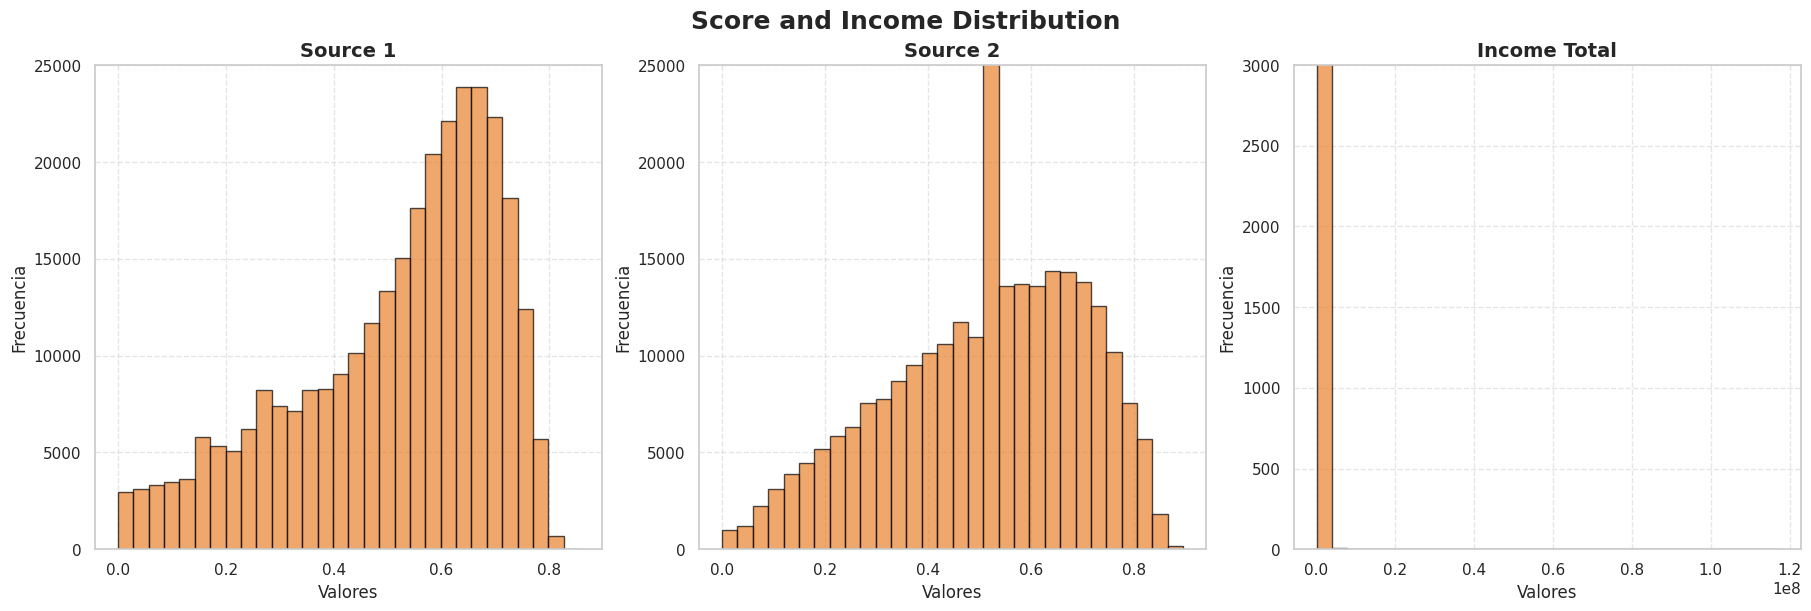

In [37]:
# Lista de variables a graficar
variables = ["EXT_SOURCE_2", "EXT_SOURCE_3", "AMT_INCOME_TOTAL"]

# Crear figura y ejes (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Ajustar el suptítulo
fig.suptitle('Score and Income Distribution', fontsize=18, fontweight='bold')

# Iterar sobre cada variable y su respectivo eje
for ax, var, i in zip(axes, variables, range(1, 4)):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Source {i}" if i <= 2 else "Income Total", fontsize=14, fontweight="bold")  # Título personalizado
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.set_ylim(0, 25000) if i <= 2 else ax.set_ylim(0, 3000)  # Establecer límites en el eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [38]:
data[variables].describe()

,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL
count,3.045310e+05,304531.000000,3.045310e+05
mean,5.142203e-01,0.515614,1.686634e+05
std,1.911246e-01,0.174780,2.378910e+05
min,8.173617e-08,0.000527,2.565000e+04
25%,3.921081e-01,0.417100,1.125000e+05
50%,5.658110e-01,0.535276,1.476000e+05
75%,6.635463e-01,0.636376,2.025000e+05
max,8.549997e-01,0.896010,1.170000e+08


* Considerando la información proporcionada por el diccionario de datos, es posible afirmar que el **50%** de los clientes habita en una región con indice de población.

* De igual forma se evidencia que la mitad de los clientes no cambian de celular por al menos **2 años** al momento de solicitar el préstamo a la entidad bancaria.

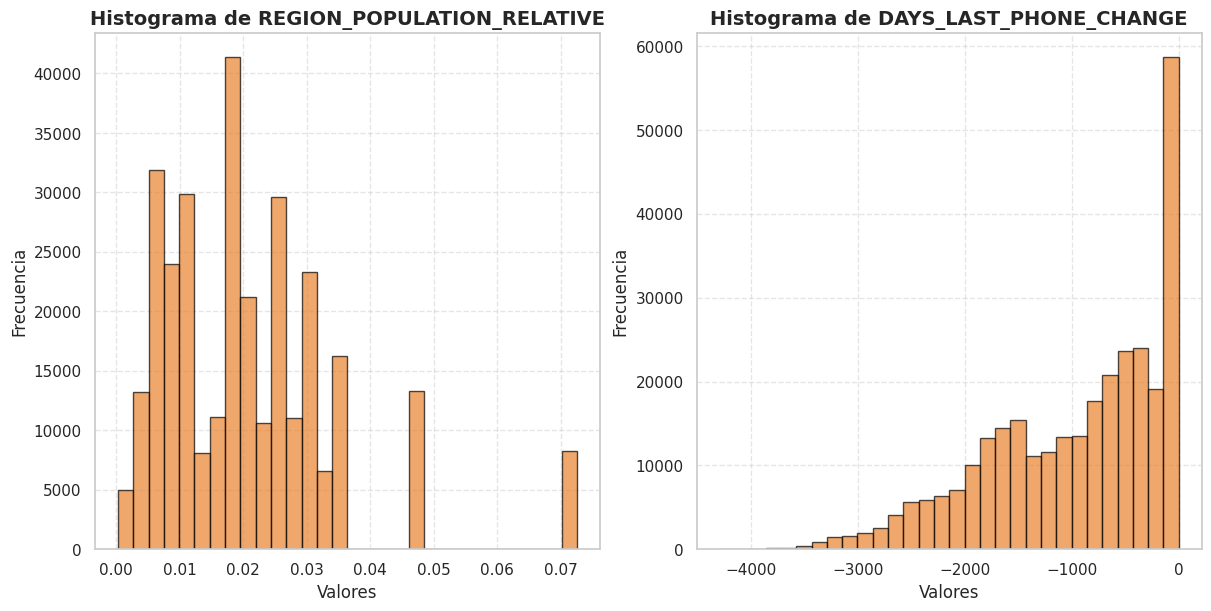

In [39]:
# Variables: REGION_POPULATION_RELATIVE y DAYS_LAST_PHONE_CHANGE
variables = ["REGION_POPULATION_RELATIVE", "DAYS_LAST_PHONE_CHANGE"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [40]:
data[variables].describe()

,REGION_POPULATION_RELATIVE,DAYS_LAST_PHONE_CHANGE
count,304531.000000,304531.000000
mean,0.020842,-965.330085
std,0.013808,826.943447
min,0.000290,-4292.000000
25%,0.010006,-1572.000000
50%,0.018850,-761.000000
75%,0.028663,-276.000000
max,0.072508,0.000000


* Podemos evidenciar que la mayor cantidad de clientes, al momento de solicitar el crédito, no cuentan con hijo alguno, de igual forma podemos evidenciar que en caso de tener algún hijo, la mayoría de clientes suelen tener a lo sumo **1 solo hijo**.

* El **50%** de los clientes tienen entre **2** y **3** familiares, aunque se presencian casos atípicos donde se registran clientes con 20 familiares.

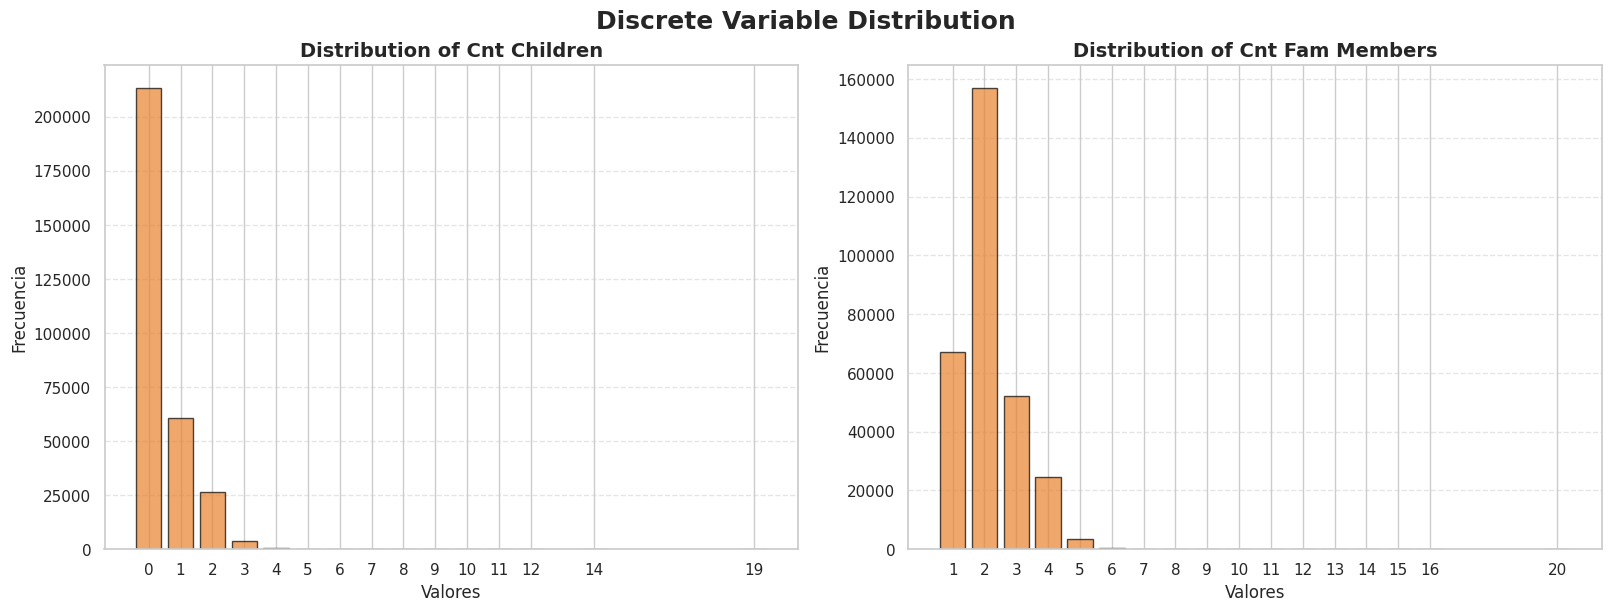

In [41]:
# Lista de variables a graficar
variables = ["CNT_CHILDREN", "CNT_FAM_MEMBERS"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# Ajustar el suptítulo
fig.suptitle('Discrete Variable Distribution', fontsize=18, fontweight='bold')

# Iterar sobre cada variable y su respectivo eje
for ax, var, i in zip(axes, variables, range(1, 3)):
    # Contar frecuencias de valores únicos
    value_counts = data[var].value_counts().sort_index()

    # Crear gráfico de barras
    ax.bar(value_counts.index, value_counts.values, color="#EA822D", edgecolor="black", alpha=0.7)
    ax.set_title(f"Distribution of {var.replace('_', ' ').title()}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)

    # Ajustar los valores del eje X como enteros
    ax.set_xticks(value_counts.index)
    ax.set_xticklabels(value_counts.index.astype(int))

    ax.grid(axis='y', linestyle="--", alpha=0.5)

# Mostrar la figura
plt.show()

In [42]:
data[variables].describe()

,CNT_CHILDREN,CNT_FAM_MEMBERS
count,304531.000000,304531.000000
mean,0.417140,2.153163
std,0.722308,0.910638
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,2.000000
75%,1.000000,3.000000
max,19.000000,20.000000


#### Información sobre la solicitud de crédito

En éste apartado se destaca información relacionada con la información del cliente al momento de la solicitud del crédito.

En primera instancia es posible evidenciar que las variables de fechas tienen un formato inusual, por lo cual la explicación que se puede realizar con la variable `DAYS_BIRTH` es la siguiente:

**Paso 1:** Se toma un valor correspondiente a la distribución de la variable, por ejemplo **-20.000**.
**Paso 2:** El valor anterior se divide por **365**, teniendo en cuenta estamos hablando términos de la edad del cliente.
**Paso 3:** Al valor anterior se le toma el valor absoluto, en este caso da un aproximado a 54 años de edad, este valor relaciona la edad del cliente al momento de solicitar el crédito.

Por tal motivo, en la variable `DAYS_BIRTH`, menores valores indican clientes de mayor edad que solicitarion un crédito. Las demás variables no hallo relación de como realizar la transformación de los datos, pero la analogía es la misma, a menor número en la variable `DAYS_REGISTRATION` indica que el cliente cambio con mayor tiempo de antelación el registro, finalmente un menor número de `DAYS_ID_PUBLISH` indica que el cliente actualizó su identificación personal mucho tiempo antes de la solicitud del crédito.

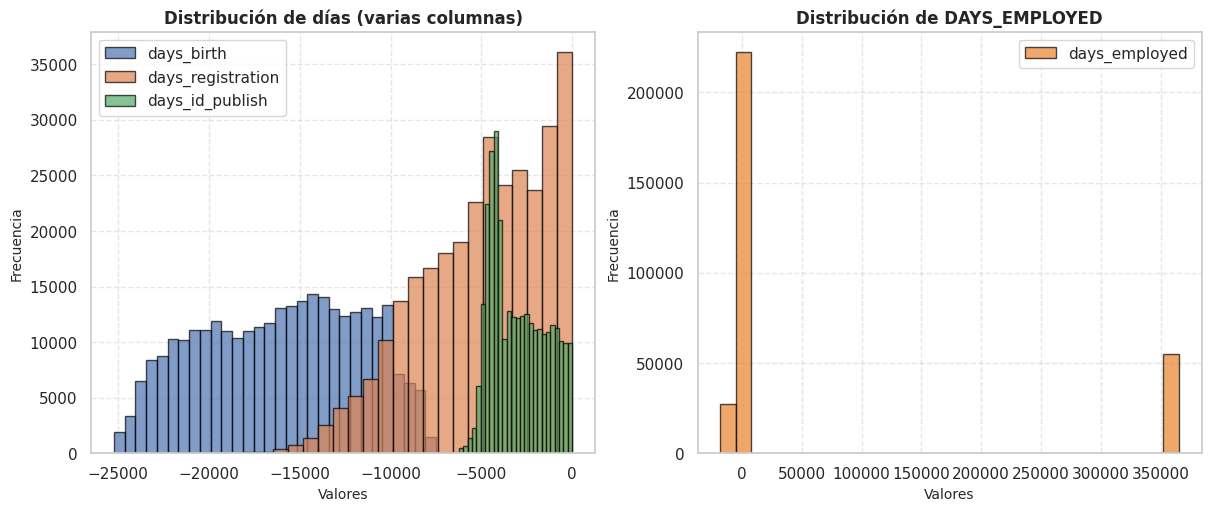

In [43]:
# Crear figura y dos axes en una fila, dos columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Gráfico de la izquierda: Múltiples variables
days_var = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for var in days_var:
    axes[0].hist(data[var], bins=30, alpha=0.7, edgecolor="black", label=var.lower())
axes[0].set_title("Distribución de días (varias columnas)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Valores", fontsize=10)
axes[0].set_ylabel("Frecuencia", fontsize=10)
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[0].legend()

# Gráfico de la derecha: Variable específica
axes[1].hist(data['DAYS_EMPLOYED'], bins=30, color="#EA822D", alpha=0.7, edgecolor="black", label='days_employed')
axes[1].set_title("Distribución de DAYS_EMPLOYED", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Valores", fontsize=10)
axes[1].set_ylabel("Frecuencia", fontsize=10)
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].legend()

# Mostrar la figura
plt.show()

In [44]:
data[days_var + ['DAYS_EMPLOYED']].describe()

,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED
count,304531.000000,304531.000000,304531.000000,304531.000000
mean,-16040.509915,-4986.687785,-2994.732070,63831.232423
std,4361.978717,3521.601095,1509.373915,141291.148422
min,-25229.000000,-24672.000000,-7197.000000,-17912.000000
25%,-19682.000000,-7478.000000,-4299.000000,-2762.000000
50%,-15755.000000,-4505.000000,-3255.000000,-1215.000000
75%,-12418.000000,-2012.000000,-1721.000000,-290.000000
max,-7489.000000,0.000000,0.000000,365243.000000


* Para la variable `AMT_CREDIT` es posible evidenciar que el **50%** de los montos aprovados tuvieron un valor menor o igual a **\$513.531** unidades monetarias, de igual forma se evidencian créditos aprovados con un monto equivalente a **\$4.050.000** unidades monetarias.

* En el caso de `AMT_ANNUITY`, es posible evidenciar que el monto aprovado en solicitudes previos alcanzó a ser a lo sumo **\$34.596** unidades monetarias para el **50%** de los clientes.

* Finalmente, `AMT_GOODS_PRICE` indica que para el **50%** de los clientes el precio del bien que se solicitó no fue mayor a **\$450.000** unidades monetarias, manteniendo un segmento de clientes que piden montos superiores a este valor e incluso hasta **\$4.050.000** unidades monetarias.

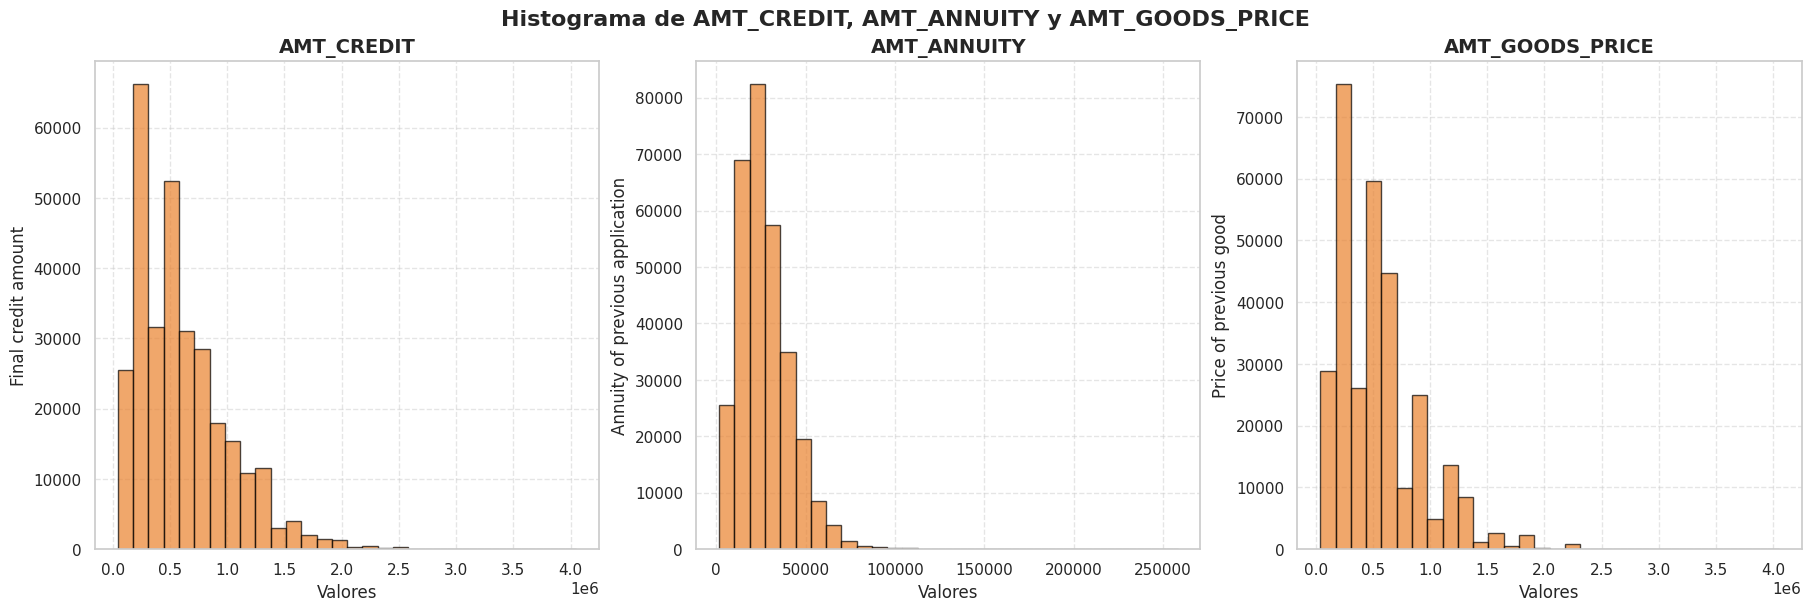

In [45]:
amt_variables = [
    "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"
]

# Crear la figura y los ejes (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Lista de etiquetas personalizadas para cada gráfico
y_labels = [
    "Final credit amount",  # Para AMT_CREDIT
    "Annuity of previous application",  # Para AMT_ANNUITY
    "Price of previous good"  # Para AMT_GOODS_PRICE
]

# Iterar sobre cada variable, su respectivo eje y la etiqueta personalizada
for ax, var, y_label in zip(axes, amt_variables, y_labels):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")  # Título con el nombre de la variable
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel(y_label, fontsize=12)  # Etiqueta eje Y personalizada
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Título general para el grupo de variables
fig.suptitle("Histograma de AMT_CREDIT, AMT_ANNUITY y AMT_GOODS_PRICE", fontsize=16, fontweight="bold")

# Mostrar la figura
plt.show()

In [46]:
data[amt_variables].describe()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.045310e+05,304531.000000,3.045310e+05
mean,5.995592e+05,27146.369655,5.384949e+05
std,4.021453e+05,14480.104699,3.690524e+05
min,4.500000e+04,1615.500000,4.050000e+04
25%,2.700000e+05,16573.500000,2.385000e+05
50%,5.172660e+05,24939.000000,4.500000e+05
75%,8.086500e+05,34641.000000,6.795000e+05
max,4.050000e+06,258025.500000,4.050000e+06


El diccionario de datos no es claro con la información que representan los datos en estas variables, por lo cual no puedo decir mucho sobre estas.

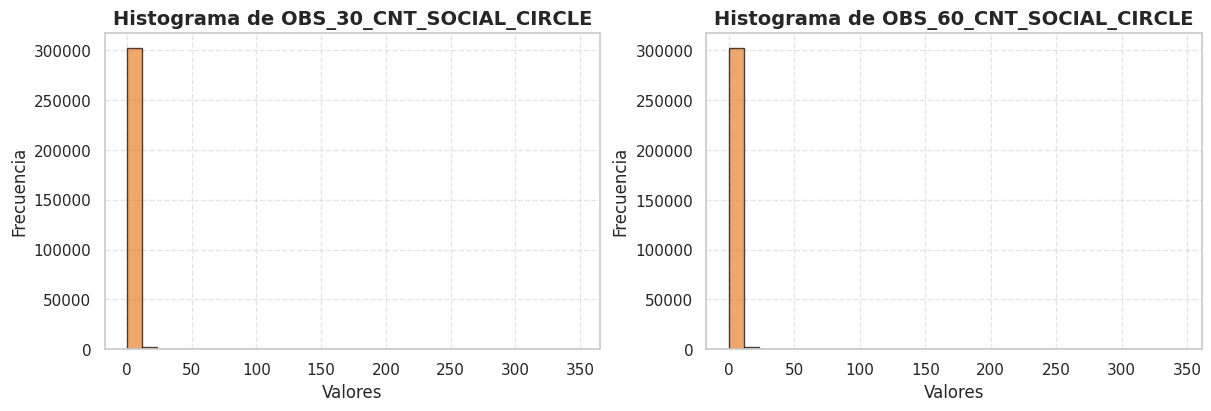

In [47]:
# Lista de variables
social_circle_variables = ["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, social_circle_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()


In [48]:
data[social_circle_variables].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,304531.000000,304531.000000
mean,1.422052,1.405131
std,2.401424,2.380308
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,348.000000,344.000000


Las variables `AMT_REQ_CREDIT_BUREAU_MON` y `AMT_REQ_CREDIT_BUREAU_YEAR` no representan relevancia estádistica, la información en los quartiles no genera información que pueda ser usada para implementar variabilidad en el modelado.

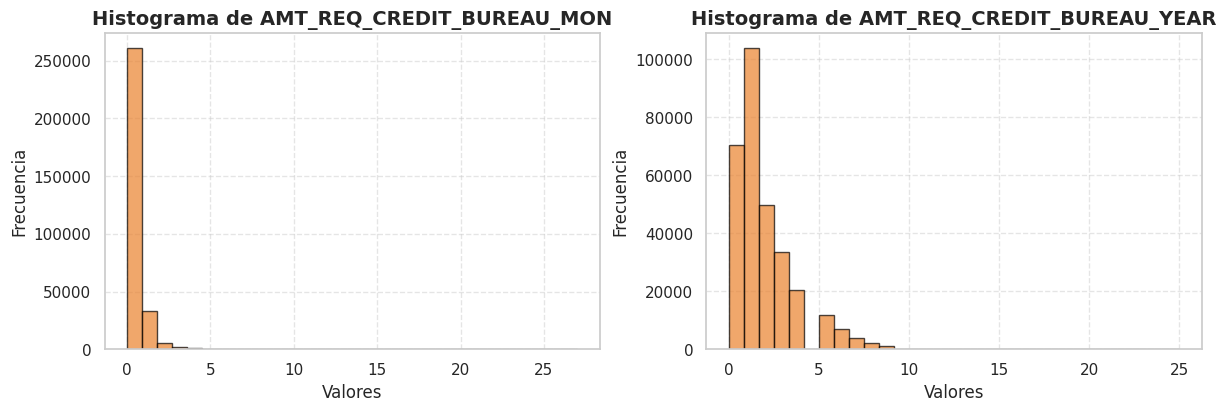

In [49]:
# Lista de variables
credit_bureau_variables = ["AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_YEAR"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, credit_bureau_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()


In [50]:
data[credit_bureau_variables].describe()

,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,304531.000000,304531.000000
mean,0.231635,1.783618
std,0.856216,1.766221
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,3.000000
max,27.000000,25.000000


Finalmente, la mitad de las solicitudes de crédito suelen tener una concentración entre las **10 am** y las **2 pm**, el comportamiento de la distribución refleja similaridad a un comportamiento normal por parte de los clientes. Algo a destacar es la presencia de solicitudes de crédito en horas como las **11 pm** o durante la **media noche**.

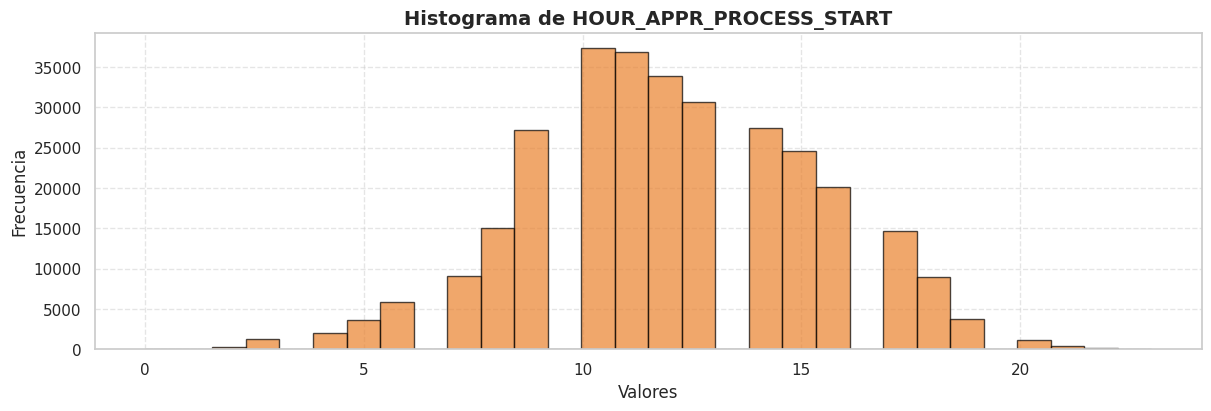

In [51]:
# Variables a graficar
variables = [
    "HOUR_APPR_PROCESS_START"
]

# Crear figura y ejes (1 fila, 1 columna)
fig, ax = plt.subplots(1, 1, figsize=(12, 4), constrained_layout=True)

# Como solo hay una variable, trabajamos directamente con 'ax' en lugar de iterar
ax.hist(data[variables[0]], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
ax.set_title(f"Histograma de {variables[0]}", fontsize=14, fontweight="bold")  # Título del gráfico
ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [52]:
data[variables].describe()

,HOUR_APPR_PROCESS_START
count,304531.000000
mean,12.060079
std,3.265884
min,0.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,23.000000


#### Selección de variables numéricas

Se eligen variables que se presume resultan ser más significativas al momento de entrenar un modelo de Machine Learning, teniendo en cuenta principalmente dos (2) diferentes aspectos, consideramos variables que creemos pueden tener una mayor **representabilidad en el negocio** y variables donde su distribución permite inferir que su **variabilidad** puede resultar útil para la correcta identificación del riesgo créditicio.

Las variables sugeridas se listan a continuación:

* REGION_POPULATION_RELATIVE
* EXT_SOURCE_2
* HOUR_APPR_PROCESS_START
* AMT_GOODS_PRICE
* AMT_CREDIT
* DAYS_BIRTH
* AMT_ANNUITY
* CNT_FAM_MEMBERS

## Análisis Bivariado

Luego de nuestro analisis uni variado del cual seleccionamos las variables que mas informacion nos pueden aportar procederemos a realizar el analisis bi-variado de las mismas.

In [62]:
numericas= ["REGION_POPULATION_RELATIVE","EXT_SOURCE_2","HOUR_APPR_PROCESS_START",
    "AMT_GOODS_PRICE","AMT_CREDIT","DAYS_BIRTH","AMT_ANNUITY","CNT_FAM_MEMBERS"]

categoricas= ["WEEKDAY_APPR_PROCESS_START","OCCUPATION_TYPE","ORGANIZATION_TYPE","NAME_INCOME_TYPE",
    "AMT_REQ_CREDIT_BUREAU_QRT","NAME_FAMILY_STATUS","REGION_RATING_CLIENT",
    "REGION_RATING_CLIENT_W_CITY","NAME_EDUCATION_TYPE","CODE_GENDER", "TARGET"]

In [64]:
data_categoricas = data[categoricas]
data_numericas = data[numericas]

In [65]:
# Opcional: Verificar las dimensiones de los nuevos DataFrames
print("Dimensiones DataFrame categóricas:", data_categoricas.shape)
print("Dimensiones DataFrame numéricas:", data_numericas.shape)

Dimensiones DataFrame categóricas: (304531, 11)
Dimensiones DataFrame numéricas: (304531, 8)


### Numérico - Numérico

Para comenzar el análisis numérico-numérico, se decidió construir una matriz de correlación de Spearman. La elección de este método se basa en que ninguna de las variables numéricas analizadas cumplió con los supuestos de normalidad según pruebas estadísticas previas.

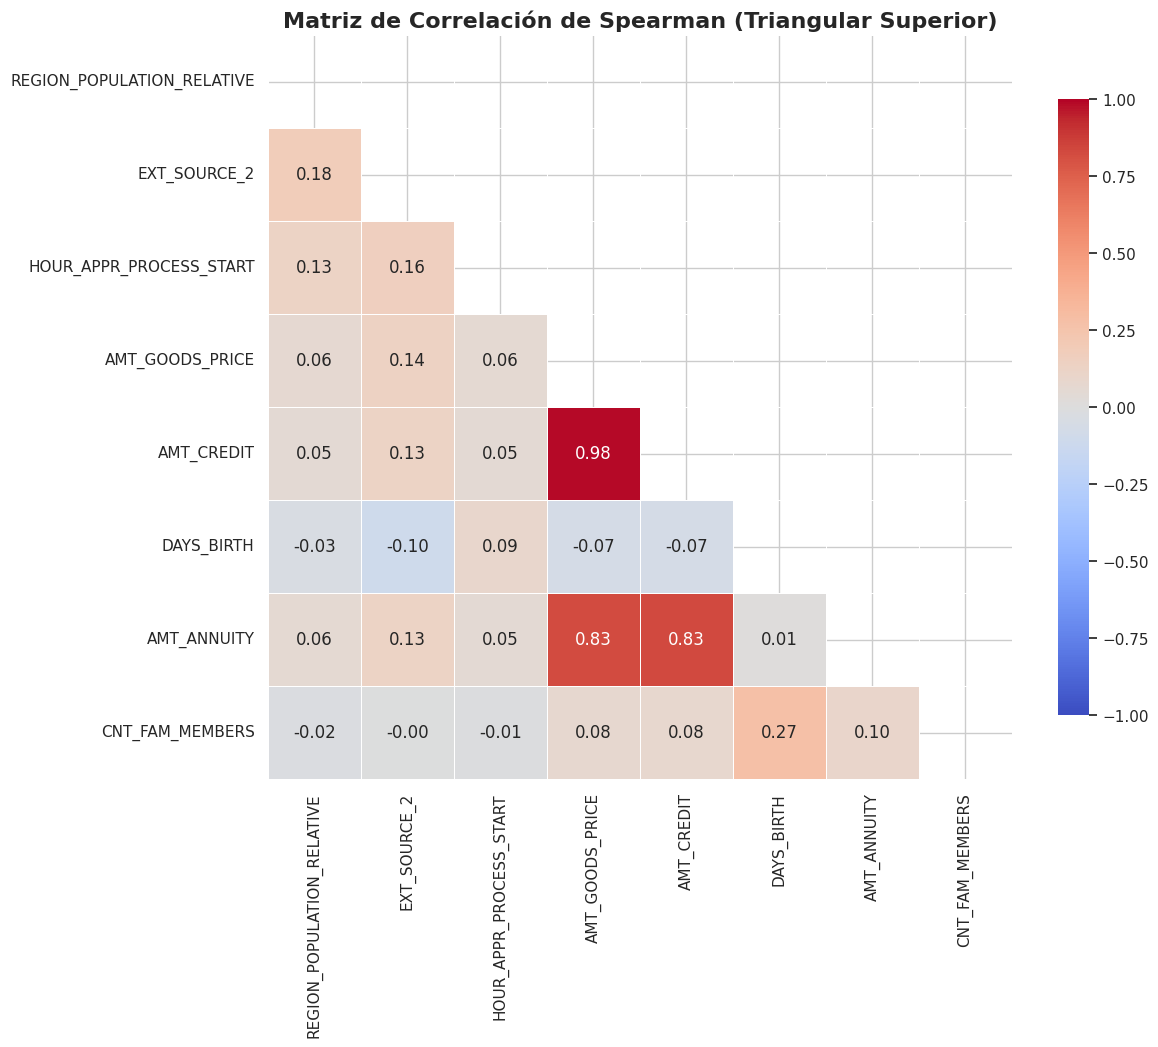

In [66]:
# Calcular la matriz de correlación de Spearman para las variables numéricas
corr_spearman = data_numericas.corr(method='spearman')

# Crear una máscara para mostrar solo la parte triangular superior
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Crear el gráfico
plt.figure(figsize=(12, 10))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", mask=mask,
            cbar_kws={"shrink": 0.8}, square=True, linewidths=0.5,
            vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title("Matriz de Correlación de Spearman (Triangular Superior)", fontsize=16, fontweight="bold")
plt.show()

* Existe una correlación extremadamente alta entre las variables AMT_CREDIT AMT_GOODS_PRICE (valor de 0.98), lo cual sugiere que estas variables podrían estar altamente relacionadas, posiblemente representando aspectos similares o dependientes en el contexto del análisis.
AMT_ANNUITY también presenta una correlación fuerte con AMT_CREDIT y AMT_GOODS_PRICE (valores de 0.83), indicando una posible asociación en términos de montos relacionados con créditos.

* Variables como CNT_FAM_MEMBERS muestran correlaciones muy bajas con el resto de las variables, lo cual podría implicar que esta no tiene una relación destacada con las demás en este conjunto de datos.

* EXT_SOURCE_2 muestra correlaciones moderadas con variables como HOUR_APPR_PROCESS_START (0.16) y AMT_GOODS_PRICE (0.14). Esto podría indicar cierto grado de dependencia entre estas variables, aunque no lo suficientemente fuerte como para ser determinante.

La matriz destaca relaciones importantes pero también indica posibles redundancias entre algunas variables (como AMT_CREDIT y AMT_GOODS_PRICE). Esto podría ser relevante para futuras etapas del análisis, donde si es necesario eliminar variables por colinealidades podría ser muy importante.

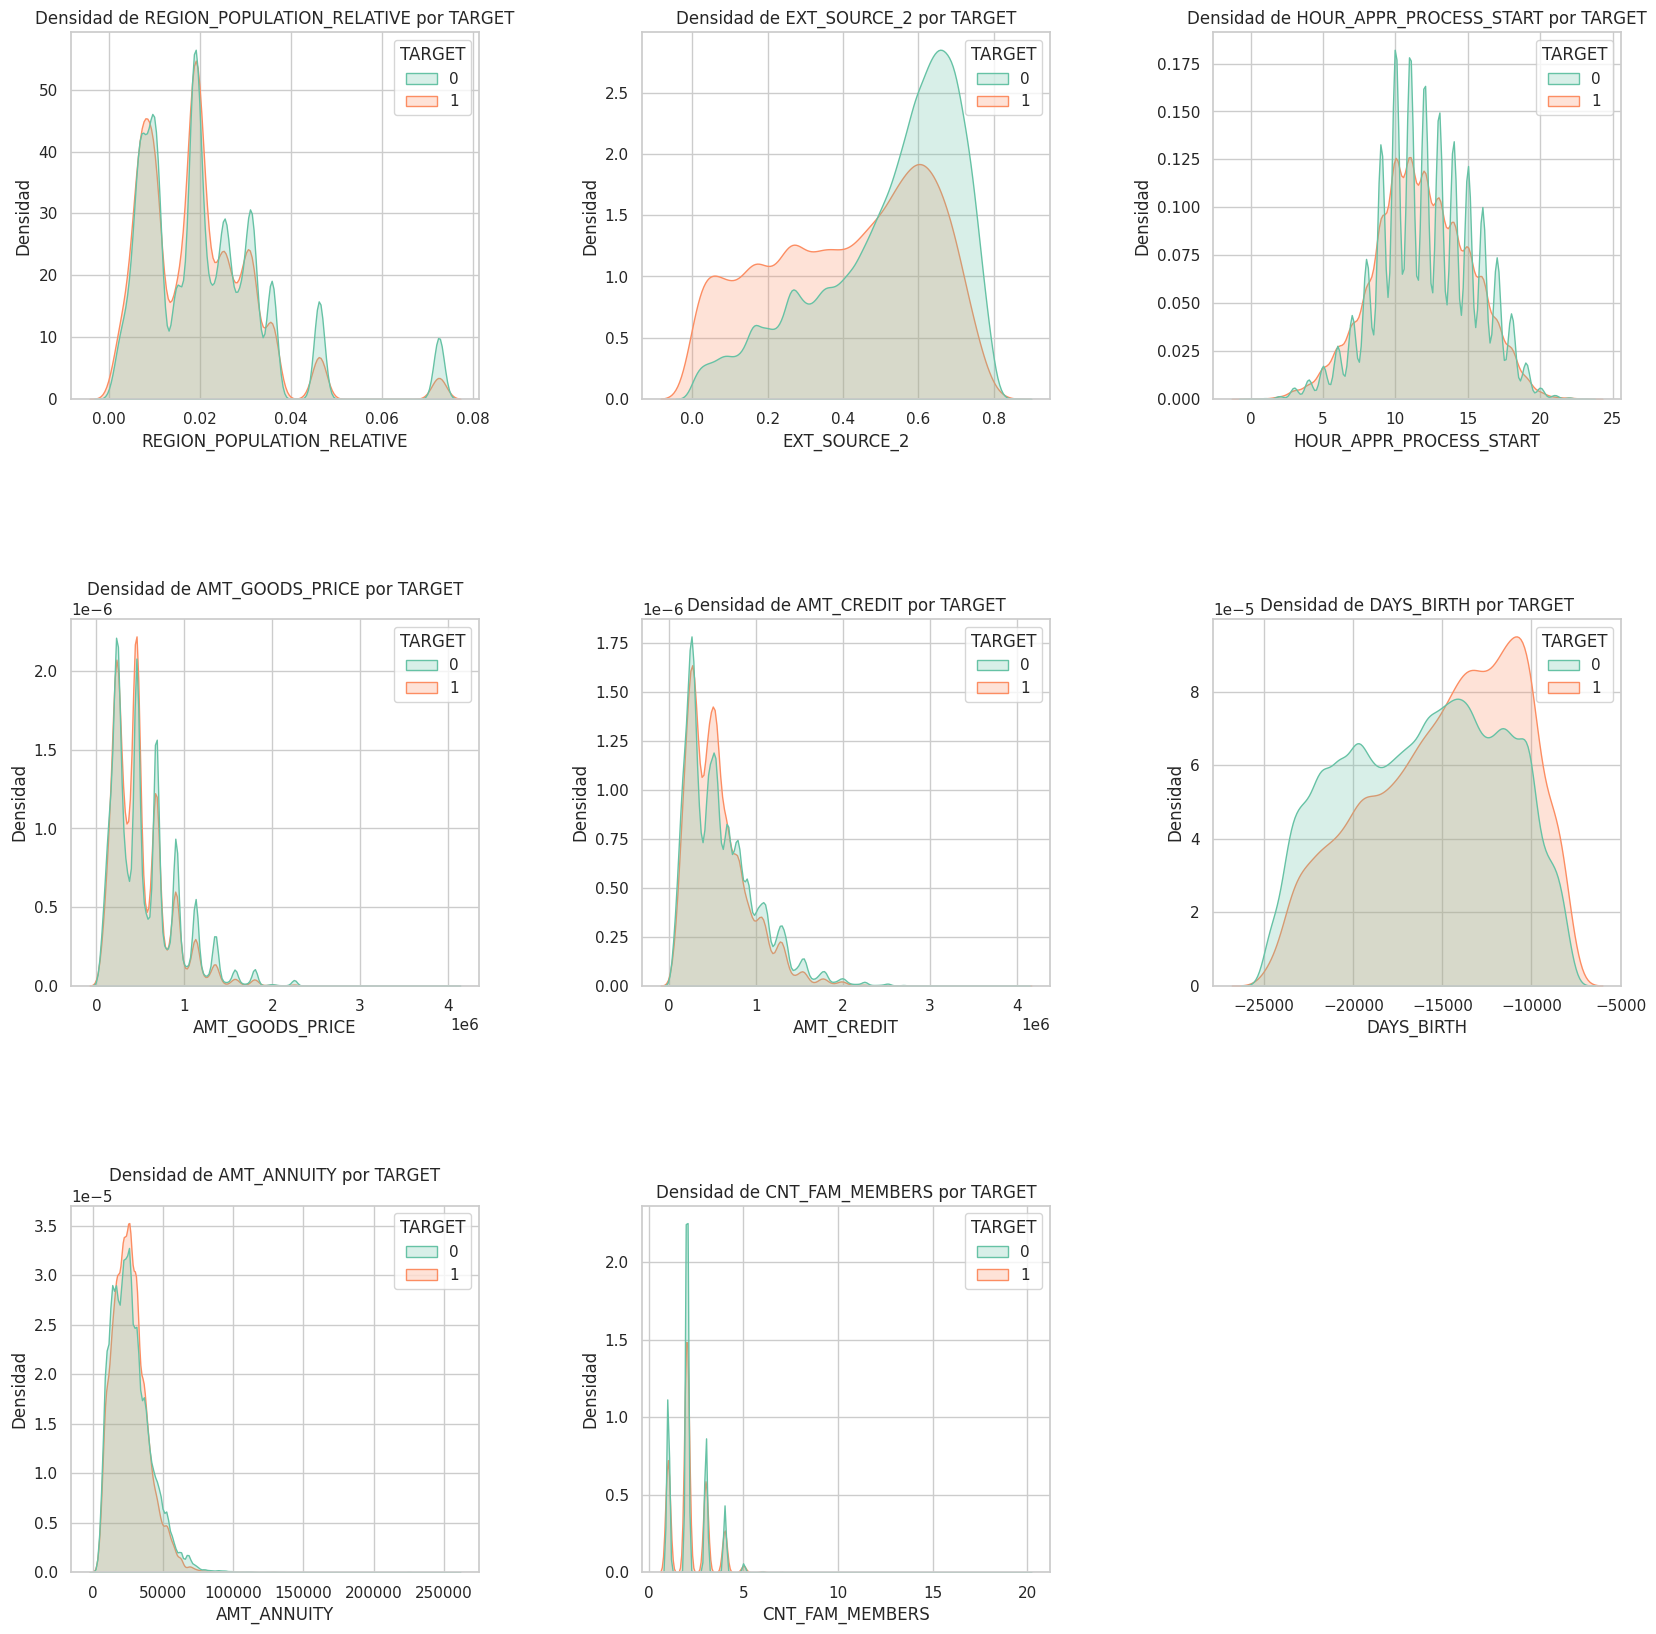

In [69]:
num_filas = 3
num_columnas = 3
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Iterar a través de las variables numéricas
for i, var in enumerate(data_numericas.columns):
    ax = axes.ravel()[i]
    sns.kdeplot(data=data_numericas.join(data_categoricas[['TARGET']]), x=var, hue='TARGET', ax=ax, fill=True, common_norm=False, palette='Set2')
    ax.set_title(f'Densidad de {var} por TARGET')
    ax.set_xlabel(var)
    ax.set_ylabel('Densidad')

# Eliminar subplots vacíos
for j in range(len(data_numericas.columns), len(axes.ravel())):
    fig.delaxes(axes.ravel()[j])

plt.show()

A partir de las gráficas que comparan variables numéricas con la variable objetivo (TARGET), se pueden sacar las siguientes conclusiones:

* REGION_POPULATION_RELATIVE:

  Las distribuciones para TARGET=0 y TARGET=1 tienen un comportamiento similar, pero hay una ligera diferencia en las proporciones para valores mas altos de esta variable. Las personas con TARGET=1 (es decir, en situación de incumplimiento o riesgo) parecen estar más concentradas en regiones de baja densidad poblacional.

* EXT_SOURCE_2:

  Existe una clara diferenciación entre las distribuciones de TARGET=0 y TARGET=1. Los valores más altos de esta variable están más asociados a TARGET=0, lo que sugiere que EXT_SOURCE_2 es un buen predictor para discriminar entre los grupos.  Las personas en riesgo (TARGET=1) tienen mayor proporción en valores más bajos de EXT_SOURCE_2.

* HOUR_APPR_PROCESS_START:

  Las distribuciones de esta variable tambien nos muestran una diferencia bastante notoria entre ambos grupos (TARGET=0 y TARGET=1), lo que indica que la hora de inicio del puede llegar a ser un factor discriminante entre los dos grupos.

  Las distribuciones de esta variable son muy similares para ambos grupos (TARGET=0 y TARGET=1), lo que indica que la hora de inicio del proceso no parece ser un factor discriminante entre los dos grupos.

* AMT_GOODS_PRICE:

  Las distribuciones de esta variable son muy similares para ambos grupos (TARGET=0 y TARGET=1), lo que indica que no parece ser un factor discriminante entre los dos grupos.


* AMT_CREDIT:

  Muy similar que en la variable anterior, las distribuciones son muy similares pero hay ligeras diferencias en los rangos más bajos.

* DAYS_BIRTH:

  Los clientes con TARGET=1 tienen una mayor proporción de personas más jóvenes (valores negativos más pequeños, ya que representan días vividos). Esto sugiere que la edad podría estar relacionada con el riesgo de incumplimiento.
  
En resumen, las variables EXT_SOURCE_2, DAYS_BIRTH, parecen tener más potencial para diferenciar entre los grupos de la variable objetivo. Variables como AMT_GOODS_PRICE muestran poca o ninguna discriminación.

### Numérico - Categórico

Ahora realizaremos el análisis numérico-categórico utilizando la prueba U de Mann-Whitney. Esta prueba es adecuada porque permite comparar las distribuciones de una variable numérica entre dos grupos definidos por una variable categórica, incluso cuando los datos no cumplen con los supuestos de normalidad. En nuestro caso, esta prueba nos ayudará a identificar si existen diferencias significativas en las distribuciones de las variables numéricas en función de las categorías de nuestras variables categóricas. Este enfoque es particularmente útil para explorar relaciones entre estos tipos de variables y determinar cuáles podrían ser relevantes para análisis posteriores o modelos.

In [72]:
# Alineamos los índices entre df_filtrado_cat_clean y df_filtrado_num_clean
data_junto = data_numericas.join(data_categoricas, how='inner')

# Lista para almacenar resultados
resultados = []

# Realizar la prueba U de Mann-Whitney para cada combinación de variable categórica y numérica
for col_num in data_numericas.columns:
    for col_cat in data_categoricas.columns:
        unique_values = data_categoricas[col_cat].unique()

        for i in range(len(unique_values)):
            for j in range(i + 1, len(unique_values)):
                # Extraer los grupos con los datos alineados
                grupo1 = data_junto[data_junto[col_cat] == unique_values[i]][col_num]
                grupo2 = data_junto[data_junto[col_cat] == unique_values[j]][col_num]

                # Verificar que ambos grupos no estén vacíos
                if len(grupo1) > 0 and len(grupo2) > 0:
                    stat, p = mannwhitneyu(grupo1, grupo2)
                    resultados.append([col_cat, unique_values[i], unique_values[j], col_num, p])

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados, columns=['Variable Categorica', 'Grupo 1', 'Grupo 2', 'Variable Numerica', 'Valor P'])

In [75]:
resultados_df.head(10)

,Variable Categorica,Grupo 1,Grupo 2,Variable Numerica,Valor P
0,WEEKDAY_APPR_PROCESS_START,WEDNESDAY,MONDAY,REGION_POPULATION_RELATIVE,0.454772
1,WEEKDAY_APPR_PROCESS_START,WEDNESDAY,THURSDAY,REGION_POPULATION_RELATIVE,0.673197
2,WEEKDAY_APPR_PROCESS_START,WEDNESDAY,SUNDAY,REGION_POPULATION_RELATIVE,0.056350
3,WEEKDAY_APPR_PROCESS_START,WEDNESDAY,SATURDAY,REGION_POPULATION_RELATIVE,0.041431
4,WEEKDAY_APPR_PROCESS_START,WEDNESDAY,FRIDAY,REGION_POPULATION_RELATIVE,0.045809
5,WEEKDAY_APPR_PROCESS_START,WEDNESDAY,TUESDAY,REGION_POPULATION_RELATIVE,0.206726
6,WEEKDAY_APPR_PROCESS_START,MONDAY,THURSDAY,REGION_POPULATION_RELATIVE,0.740272
7,WEEKDAY_APPR_PROCESS_START,MONDAY,SUNDAY,REGION_POPULATION_RELATIVE,0.168365
8,WEEKDAY_APPR_PROCESS_START,MONDAY,SATURDAY,REGION_POPULATION_RELATIVE,0.006816
9,WEEKDAY_APPR_PROCESS_START,MONDAY,FRIDAY,REGION_POPULATION_RELATIVE,0.006070


In [76]:
# Calcular el total de combinaciones, significativas y no significativas
total_combinaciones = len(resultados_df)
significativos = resultados_df[resultados_df['Valor P'] < 0.05]
num_significativos = len(significativos)

no_significativos = resultados_df[resultados_df['Valor P'] >= 0.05]
num_no_significativos = len(no_significativos)

# Crea una tabla de resumen
resumen = pd.DataFrame({
    'Total Combinaciones': [total_combinaciones],
    'Combinaciones Significativas': [num_significativos],
    'Combinaciones No Significativas': [num_no_significativos]
})

# Mostrar la tabla de resumen
print(resumen)


   Total Combinaciones  Combinaciones Significativas  \
0                  488                           372   

   Combinaciones No Significativas  
0                              116  


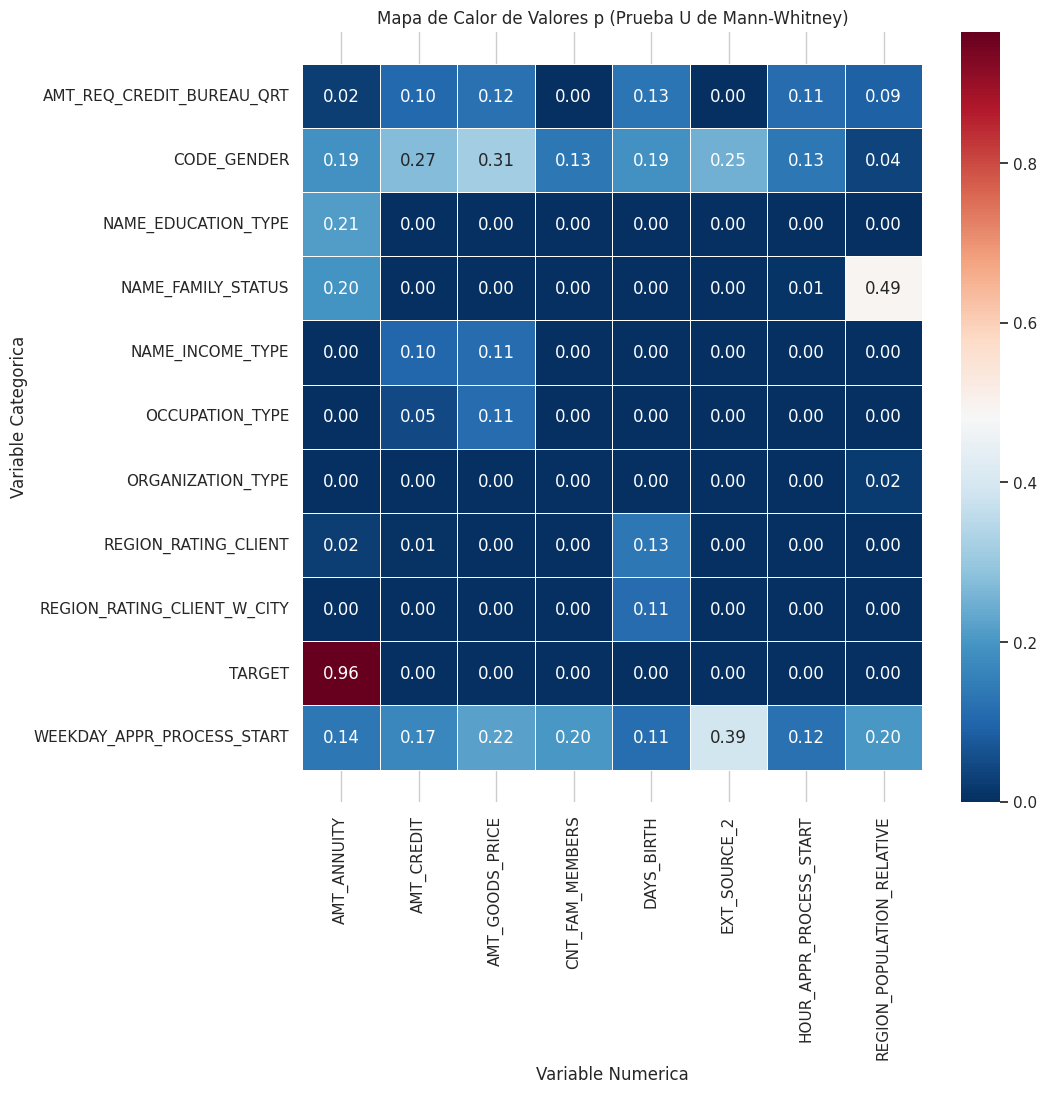

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de p-values usando pivot_table
p_matrix = resultados_df.pivot_table(index='Variable Categorica', columns='Variable Numerica', values='Valor P')

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el mapa de calor
ax = sns.heatmap(p_matrix, annot=True, fmt=".2f", linecolor="w", cmap="RdBu_r", linewidths=0.5)

# Ajustar etiquetas en el eje y
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)

# Ajustar los límites en el eje y para que se vea mejor
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)

# Título del gráfico
plt.title("Mapa de Calor de Valores p (Prueba U de Mann-Whitney)")

# Mostrar el gráfico
plt.show()

* Valores p bajos (aproximadamente ≤ 0.05):

  Indican que existe una diferencia estadísticamente significativa entre las distribuciones de las variables numéricas con respecto a las categorías de la variable categórica correspondiente.
  
  Por ejemplo:
  La variable NAME_EDUCATION_TYPE tiene valores p bajos en la mayoría de las variables categóricas, lo que sugiere que podría ser influenciada por estas variables.

* Valores p altos (> 0.05):

  Indican que no hay evidencia suficiente para rechazar la hipótesis nula, es decir, que las distribuciones no son significativamente diferentes.

* Relaciones significativas (p ≤ 0.05):
  Las variables categóricas NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, y ORGANIZATION_TYPE muestran valores p consistentemente bajos frente a varias variables numéricas, indicando que estas variables categóricas tienen una relación potencialmente importante con las numéricas.

  EXT_SOURCE_2 tiene valores p de 0.00 frente a casi todas las categóricas, lo que sugiere que es sensible a estas clasificaciones.


  
* WEEKDAY_APPR_PROCESS_START:Tiene valores p elevados con algunas variables numéricas como AMT_GOODS_PRICE y bajos con otras como EXT_SOURCE_2, lo que indica que su influencia puede ser limitada o específica.


Las variables categóricas con valores p consistentemente bajos frente a varias numéricas (como NAME_INCOME_TYPE, OCCUPATION_TYPE) son candidatas importantes para análisis más profundos.

### Categórico - Categórico

Ahora procederemos con el análisis categóricas-categóricas mediante la prueba de chi-cuadrado. Esta prueba es ideal para evaluar la relación entre dos variables categóricas, ya que permite determinar si existe una asociación estadísticamente significativa entre las categorías de ambas variables. En este contexto, utilizaremos la prueba para identificar dependencias o patrones entre nuestras variables categóricas, lo que puede ser útil para comprender su interacción y su posible impacto en el análisis global.

In [80]:
def prueba_chi_cuadrado2(dataframe, variables):
    num_variables = len(variables)
    results = []

    for i in range(num_variables):
        for j in range(i + 1, num_variables):
            variable1 = variables[i]
            variable2 = variables[j]

            tabla_contingencia = pd.crosstab(dataframe[variable1], dataframe[variable2])
            chi2, p, _, _ = chi2_contingency(tabla_contingencia)
            if not pd.isna(p):  # Filtrar valores p NaN
                results.append([variable1, variable2, p, p < 0.05])

    columns = ['Variable 1', 'Variable 2', 'P-Valor', 'Rechazo Ho']
    result_df = pd.DataFrame(results, columns=columns)
    return result_df

In [83]:
resultados = prueba_chi_cuadrado2(data_categoricas, data_categoricas.columns)

In [84]:
resultados.head()

,Variable 1,Variable 2,P-Valor,Rechazo Ho
0,WEEKDAY_APPR_PROCESS_START,OCCUPATION_TYPE,7.526764e-78,True
1,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,3.822375e-61,True
2,WEEKDAY_APPR_PROCESS_START,NAME_INCOME_TYPE,1.302278e-52,True
3,WEEKDAY_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_QRT,1.128762e-117,True
4,WEEKDAY_APPR_PROCESS_START,NAME_FAMILY_STATUS,4.296338e-02,True


In [88]:
data_categoricas.head()

,WEEKDAY_APPR_PROCESS_START,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_INCOME_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,NAME_FAMILY_STATUS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,NAME_EDUCATION_TYPE,CODE_GENDER,TARGET
0,WEDNESDAY,Laborers,Business Entity Type 3,Working,0.0,Single / not married,2,2,Secondary / secondary special,M,1
1,MONDAY,Otros,Otros,Otros,0.0,Married,1,1,Higher education,F,0
2,MONDAY,Laborers,Otros,Working,0.0,Single / not married,2,2,Secondary / secondary special,M,0
3,WEDNESDAY,Laborers,Business Entity Type 3,Working,Desconocido,Otros,2,2,Secondary / secondary special,F,0
4,THURSDAY,Otros,Otros,Working,0.0,Single / not married,2,2,Secondary / secondary special,M,0


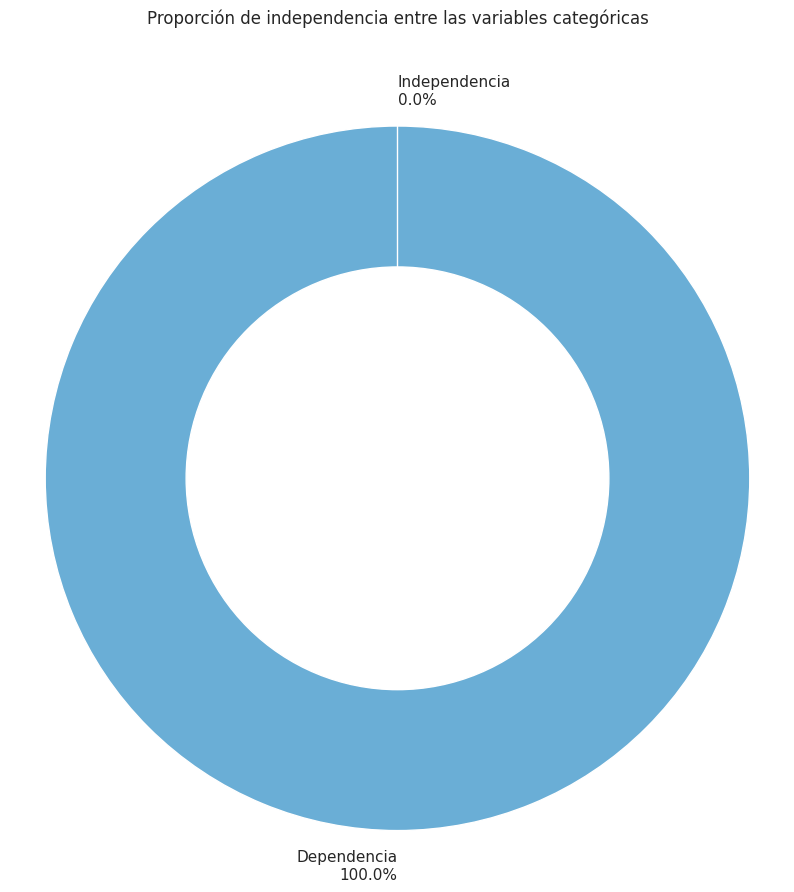

In [92]:
proporcion_exito = len(resultados[resultados['Rechazo Ho'] == True]) / len(resultados)
proporcion_fracaso = len(resultados[resultados['Rechazo Ho'] == False]) / len(resultados)
# Etiquetas para el gráfico de donut
etiquetas = [f'Dependencia\n{proporcion_exito:.1%}', f'Independencia\n{proporcion_fracaso:.1%}']
sizes = [proporcion_exito, proporcion_fracaso]
colores = plt.cm.Blues([0.5, 0.7])  # Colores para Éxito y Fracaso

# Crea un gráfico de donut
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=etiquetas, autopct='', colors=colores, startangle=90)

# Agrega un círculo en el centro para convertirlo en un donut
centro_del_circulo = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_del_circulo)

# Añade un título con espacio ajustado
plt.title('Proporción de independencia entre las variables categóricas', pad=50)  # Ajusta el valor de pad según sea necesario

# Muestra el gráfico
plt.axis('equal')  # Asegura que el gráfico se vea como un círculo
plt.show()

Con base en este gráfico de proporción de independencia entre variables categóricas, podemos inferir lo siguiente:

* El 100% de las pruebas de Chi-cuadrado realizadas indican que existe dependencia estadísticamente significativa entre las variables categóricas evaluadas. Esto significa que, en cada combinación de variables categóricas analizadas, se rechazó la hipótesis nula de independencia.

* La dependencia detectada sugiere que las variables categóricas tienen una relación significativa entre sí. Esto podría reflejar patrones o asociaciones relevantes que merecen un análisis más profundo.

El resultado muestra que no hay casos de independencia (0%) en las pruebas realizadas, lo que refuerza la idea de que las variables categóricas estudiadas interactúan de manera significativa dentro del conjunto de datos.








# Modelado

## Selección y justificación de métricas

Dado el contexto del negocio, nos planteamos qué tipo de error *(falsos positivos o falsos negativos)* debemos priorizar en nuestro modelo para lograr un desempeño óptimo. Es importante considerar que la clase positiva se asigna a clientes que han incurrido en mora en sus pagos, mientras que la clase negativa corresponde a clientes que han cumplido a tiempo con sus compromisos crediticios.

Consideramos que es más preocupante clasificar a un cliente como cumplido *(clase negativa)* cuando, en realidad, dicho cliente entra en mora, en comparación con clasificar incorrectamente a un cliente cumplido como si fuera moroso. En el primer escenario, la institución financiera podría perder grandes sumas de dinero debido a personas que no cumplen con sus hábitos de pago. Por otro lado, en el segundo caso, la institución no se expone a pérdidas monetarias, aunque podría dejar de captar clientes valiosos para el negocio. Por tal motivo, la primera métrica que evaluaremos será **False Negative Rate**.

Sin embargo, al notar que este conjunto de datos está desbalanceado, hemos decidido implementar métricas de evaluación que nos ayuden a mitigar este problema. En particular, utilizaremos el **Recall** para contrastar los verdaderos positivos con los falsos negativos, y el **Fbeta-score** para evaluar el desempeño del modelo, priorizando la métrica de recall sobre precision.

Finalmente, para computar el error general del modelo, hemos decidido implementar la métrica **Balanced Error Rate**, con el objetivo de obtener una visión global del error de clasificación.

Función de la métrica **False Negative Rate**.

In [1]:
def FNR(y_true, y_pred):
    
    # Calcular la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calcular el False Negative Rate
    return fn / (fn + tp) #if (fn + tp) > 0 else 0

Función de la métrica **Recall**.

In [2]:
def Recall(y_true, y_pred):

    # Calcular la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calcular Recall
    return tp / (tp + fn) if (tp + fn) > 0 else 0

Función de la métrica **Fbeta-score**.

In [11]:
betas = [0.1, 0.3, 0.5, 0.7, 1, 2, 5]

def fbeta(y_true, y_scores, beta_values=betas):

    # Calcular precision, recall y thresholds
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)

    # Inicializar el gráfico
    plt.figure(figsize=(10, 6))

    # Iterar sobre los valores de beta
    for beta in beta_values:
        fbeta_scores = []
        for p, r in zip(precisions, recalls):
            if p + r > 0:
                beta_squared = beta ** 2
                fbeta = (1 + beta_squared) * (p * r) / (beta_squared * p + r)
                fbeta_scores.append(fbeta)
            else:
                fbeta_scores.append(0)
        
        # Graficar F-beta score vs. thresholds
        plt.plot(thresholds, fbeta_scores[:-1], label=f"F{beta}")
    
    # Configurar el gráfico
    plt.xlabel("Umbral")
    plt.ylabel("F-beta")
    plt.title("F-beta Score vs el umbral")
    plt.legend()
    plt.grid()
    plt.show()

Función para la métrica **Balanced Error Rate**.

In [ ]:
def BER(y_true, y_pred):
    
    # Calcular la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calcular TPR (Recall) y TNR (Specificity)
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate (Sensibilidad)
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate (Especificidad)
    
    # Calcular Balanced Error Rate
    ber = 1 - 0.5 * (tpr + tnr)
    
    return ber

## Selección y justificación de los modelos

## Implementación del <modelo 1>

## Implementación del <modelo 2>

## Comparación de modelos

# Conclusiones

Durante el análisis exploratorio de datos se evidenció lo siguiente:

* El conjunto de datos está desbalanceado, con la clase dominante representando buen comportamiento en pagos de crédito.

* Hay variables categóricas desbalanceadas con descripciones poco claras, lo que dificulta su interpretación para procesos de inferencia.

* Se destacan variables como `OCCUPATION_TYPE` (tipo de ocupación) y `WEEKDAY_APPR_PROCESS_START` (días de mayor solicitud de crédito), por su variabilidad y fácil interpretación.

* Aunque ninguna variable cumple con los supuestos de normalidad, `HOUR_APPR_PROCESS_START` muestra un comportamiento cercano a la normalidad, lo que puede ser útil para el modelado.

* La mayoría de los clientes no tienen hijos, pero viven con dos personas.

* Se observó que los clientes tienden a vivir en zonas poco pobladas y cambiar de dispositivo móvil cerca de la fecha de solicitud de crédito.

* Se identificó una alta correlación en algunas variables numéricas y dependencia entre variables categóricas, lo que se tuvo en cuenta para mitigar problemas de multicolinealidad.

* Tras un análisis más exhaustivo, se concluyó que la distribución de muchas variables numéricas no presenta diferencias significativas entre las clases de la variable objetivo, por lo que se seleccionaron variables con mayor discrepancia en su distribución.

Durante la fase de modelado, se logró evidenciar los siguiente:

* Gracias a la información proporcionada por el contexto y el desbalance de los datos, fue posible determinar métricas que se ajustan a los objetivos del negocio de la entidad financiera. Estas métricas están orientadas a lograr un modelado óptimo para evitar aprobar créditos a clientes que se prevea puedan incurrir en mora con sus pagos.